In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sequenzo import *

In [4]:
occupation_df = pd.read_csv("/Users/lei/Documents/Sequenzo_all_folders/sequenzo_local/test_data/real_data_my_paper/detailed_sequence_10_work_years_df.csv")
seniority_df = pd.read_csv("/Users/lei/Documents/Sequenzo_all_folders/sequenzo_local/test_data/real_data_my_paper/detailed_senority_levels_for_10_years.csv")

# Rename values in occupation_df (in columns C1...C10): data & intensive math -> data science, software & hardware -> systems & infrastructure

for i in range(1, 11):
    occupation_df[f"C{i}"] = occupation_df[f"C{i}"].replace({"data & intensive math": "data science", "software & hardware": "systems & infrastructure"})

# Capitalize the first letter of each state
for i in range(1, 11):
    occupation_df[f"C{i}"] = occupation_df[f"C{i}"].str.capitalize()

# Delete additional individuals in occupation_df as the seniority_df only has 32628 individuals

occupation_df = occupation_df[occupation_df["worker_id"].isin(seniority_df["worker_id"])]

occupation_df.to_csv("/Users/lei/Documents/Sequenzo_all_folders/sequenzo_local/test_data/real_data_my_paper/detailed_sequence_10_work_years_df_new_states_names.csv", index=False)

occupation_df


,worker_id,gender,country,cohort,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10
0,dilip-kumar-nath-7538746a,male,india,11-20 total work years,Software,Software,Software,Software,Software,Software,Software,Software,Software,Software
1,vinodkumar-yadav-b7a976107,male,india,11-20 total work years,Software,Software,Software,Software,Software,Software,Software,Software,Software,Software
2,josh-slosson-07a1509,male,india,11-20 total work years,Software,Software,Software,Software,Software,Software,Software,Software,Software,Software
3,jonatthan-rodriguez-8a5612121,male,india,11-20 total work years,Software,Software,Software,Software,Software,Software,Software,Software,Software,Software
4,jeenesh-jyothindran-8ba28818,male,india,11-20 total work years,Software,Software,Software,Software,Software,Software,Software,Software,Software,Software
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38896,michelle-elder,female,us,21-30 total work years,Software,Software,Software,Software,Software,Software,Systems & infrastructure,Systems & infrastructure,Systems & infrastructure,Systems & infrastructure
38897,nan-jiang-743a9863,female,us,0-10 total work years,Software,Software,Software,Software,Software,Software,Software,Software,Software,Software
38898,tina-pava-4846207,female,us,21-30 total work years,Software,Software,Software,Software,Software,Software,Software,Software,Software,Software
38899,sariandoni,female,us,21-30 total work years,Support & test,Software,Software,Software,Software,Software,Software,Research,Research,Research


In [5]:
# States are: 'Assistant', 'Chief or founder', 'Junior', 'Leader', 'Regular', 'Senior'
# Merge values for individuals in seniority_df for Y1 - Y10: 'Assistant' and 'Junior' -> 'Assistant/Junior'

for i in range(1, 11):
    seniority_df[f"Y{i}"] = seniority_df[f"Y{i}"].replace({"Assistant": "Assistant/Junior", "Junior": "Assistant/Junior", "Chief or founder": "Chief/founder"})

seniority_df.to_csv("/Users/lei/Documents/Sequenzo_all_folders/sequenzo_local/test_data/real_data_my_paper/detailed_senority_levels_for_10_years_cleaned_and_merged.csv", index=False)

seniority_df

,worker_id,gender,country,cohort,highest_educational_degree,whether_bachelor_university_prestigious,internationalization,work_years,company_size,Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,Y9,Y10
0,dilip-kumar-nath-7538746a,male,india,11-20 total work years,Bachelor,False,Multinational,15.250,"1,001-5,000 employees",Regular,Regular,Regular,Regular,Senior,Senior,Senior,Senior,Senior,Senior
1,vinodkumar-yadav-b7a976107,male,india,11-20 total work years,Bachelor,False,Local,11.500,"5,001-10,000 employees",Regular,Regular,Regular,Regular,Regular,Regular,Regular,Regular,Regular,Regular
2,rajani-kulkarni-72674649,female,india,11-20 total work years,Bachelor,False,Multinational,11.250,"10,001+ employees",Regular,Regular,Regular,Regular,Regular,Regular,Regular,Leader,Leader,Regular
3,josh-slosson-07a1509,male,india,11-20 total work years,Bachelor,False,International,18.417,11-50 employees,Regular,Regular,Regular,Regular,Regular,Regular,Regular,Regular,Regular,Regular
4,jonatthan-rodriguez-8a5612121,male,india,11-20 total work years,Bachelor,False,Multinational,11.917,"5,001-10,000 employees",Regular,Regular,Senior,Senior,Senior,Senior,Senior,Senior,Senior,Senior
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32623,edwardgu1915,male,us,0-10 total work years,Master,False,Multinational,10.499,"501-1,000 employees",Leader,Leader,Leader,Leader,Leader,Senior,Senior,Senior,Regular,Senior
32624,terry-ferguson-8060363a,male,us,21-30 total work years,Bachelor,False,Local,21.001,"10,001+ employees",Regular,Regular,Regular,Regular,Regular,Regular,Regular,Regular,Regular,Regular
32625,christy-garner-677894213,female,us,21-30 total work years,Bachelor,False,Multinational,27.250,"501-1,000 employees",Regular,Regular,Regular,Regular,Regular,Regular,Regular,Regular,Regular,Regular
32626,jay-p-119369202,male,us,21-30 total work years,Bachelor,False,Local,23.417,"10,001+ employees",Regular,Regular,Regular,Regular,Regular,Regular,Regular,Regular,Regular,Regular


In [6]:
# Work year column name cleaning: C1...C10 -> 1...10, Y1...Y10 -> 1...10

occupation_df.columns = [col.replace("C", "").replace("Y", "") for col in occupation_df.columns]
seniority_df.columns = [col.replace("C", "").replace("Y", "") for col in seniority_df.columns]

occupation_df.to_csv("/Users/lei/Documents/Sequenzo_all_folders/sequenzo_local/test_data/real_data_my_paper/detailed_sequence_10_work_years_df_clean_year_names_column.csv", index=False)
seniority_df.to_csv("/Users/lei/Documents/Sequenzo_all_folders/sequenzo_local/test_data/real_data_my_paper/detailed_senority_levels_for_10_years_clean_year_names_column.csv", index=False)

occupation_df

,worker_id,gender,country,cohort,1,2,3,4,5,6,7,8,9,10
0,dilip-kumar-nath-7538746a,male,india,11-20 total work years,Software,Software,Software,Software,Software,Software,Software,Software,Software,Software
1,vinodkumar-yadav-b7a976107,male,india,11-20 total work years,Software,Software,Software,Software,Software,Software,Software,Software,Software,Software
2,josh-slosson-07a1509,male,india,11-20 total work years,Software,Software,Software,Software,Software,Software,Software,Software,Software,Software
3,jonatthan-rodriguez-8a5612121,male,india,11-20 total work years,Software,Software,Software,Software,Software,Software,Software,Software,Software,Software
4,jeenesh-jyothindran-8ba28818,male,india,11-20 total work years,Software,Software,Software,Software,Software,Software,Software,Software,Software,Software
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38896,michelle-elder,female,us,21-30 total work years,Software,Software,Software,Software,Software,Software,Systems & infrastructure,Systems & infrastructure,Systems & infrastructure,Systems & infrastructure
38897,nan-jiang-743a9863,female,us,0-10 total work years,Software,Software,Software,Software,Software,Software,Software,Software,Software,Software
38898,tina-pava-4846207,female,us,21-30 total work years,Software,Software,Software,Software,Software,Software,Software,Software,Software,Software
38899,sariandoni,female,us,21-30 total work years,Support & test,Software,Software,Software,Software,Software,Software,Research,Research,Research



[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 32628
[>] Number of time points: 10
[>] Min/Max sequence length: 10 / 10
[>] States: ['Data', 'Data science', 'Software', 'Hardware', 'Systems & infrastructure', 'Research', 'Support & test']
[>] Labels: ['Data', 'Data science', 'Software', 'Hardware', 'Systems & infrastructure', 'Research', 'Support & test']


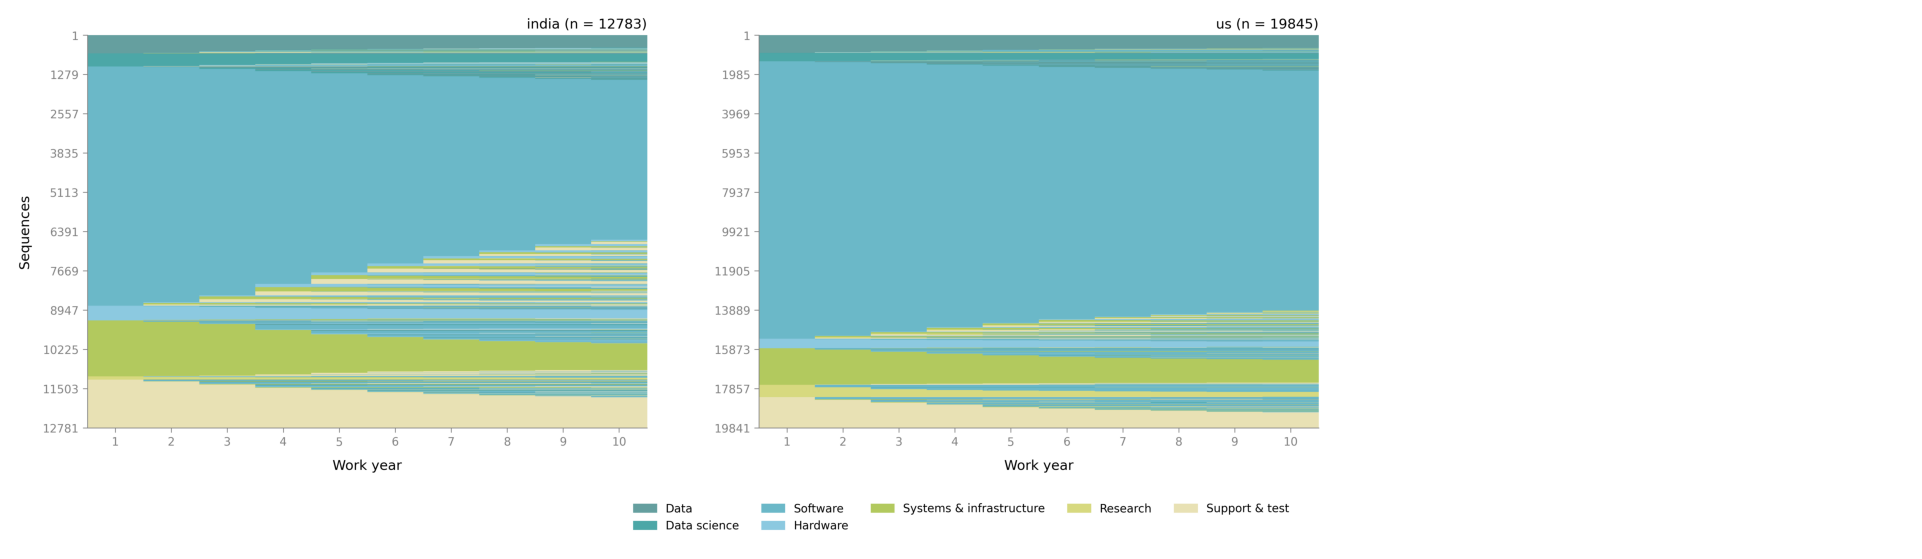


[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 32628
[>] Number of time points: 10
[>] Min/Max sequence length: 10 / 10
[>] States: ['Assistant/Junior', 'Regular', 'Senior', 'Leader', 'Chief/founder']
[>] Labels: ['Assistant/Junior', 'Regular', 'Senior', 'Leader', 'Chief/founder']


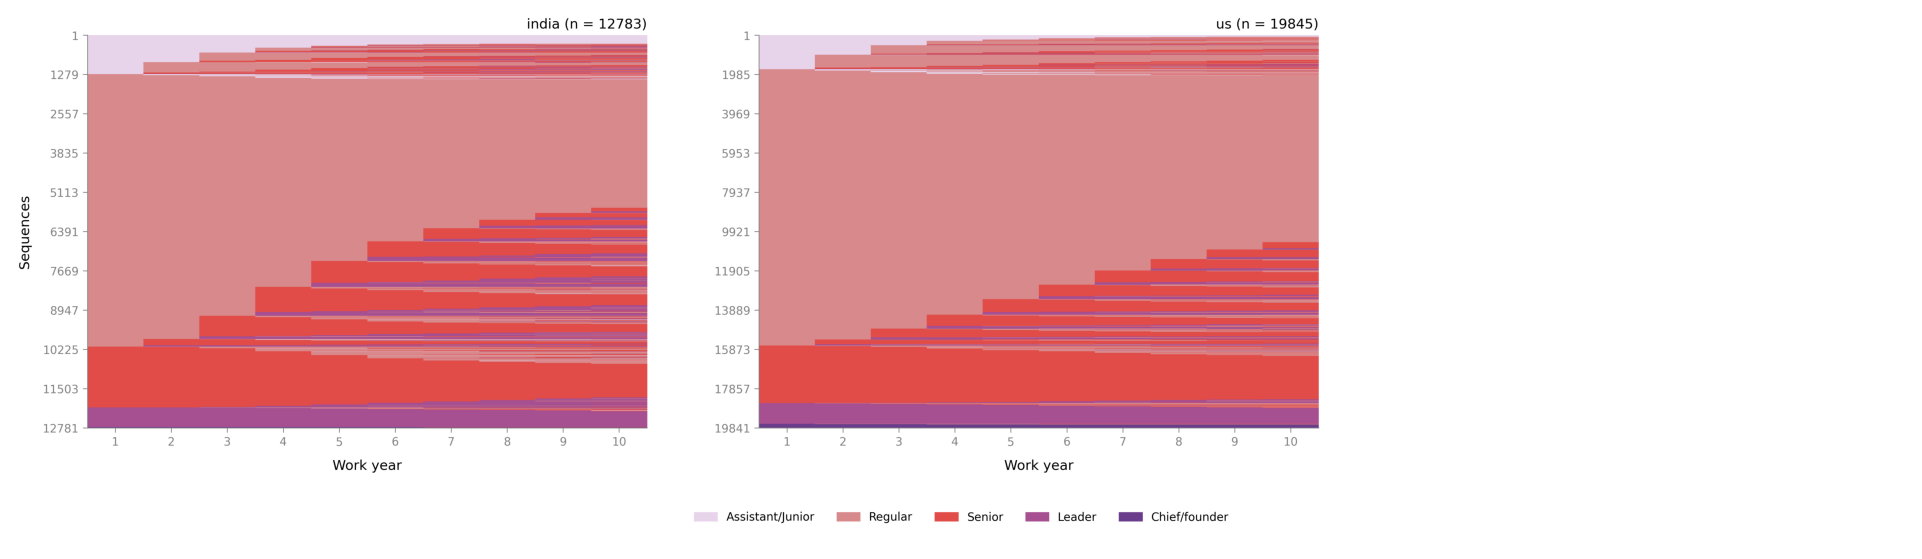

In [7]:
# Overall sequence data (country-specific will be in regression after cluster analysis)

# Occupation sequence data
time_cols = [str(i) for i in range(1, 11)]
state_list = ['Data', 'Data science', 'Software', 'Hardware', 'Systems & infrastructure', 'Research', 'Support & test']
    
occupation_sequence = SequenceData(
    data=occupation_df,
    id_col="worker_id",
    time=time_cols,
    states=state_list,
    time_type="year",
    # TODO: Add more colors for the states but in the same color scale and pretty
    custom_colors = [
"#659F9F",  # Data（深青灰）
    "#4CA7A7",  # Data（清透青绿）
    "#6BB8C8",  # 过渡（亮湖蓝）
    "#8CC9E0",  # Data science（天蓝）
    "#B2C95E",  # Software（亮黄绿）
    "#D7D97F",  # 过渡（浅黄绿）
    "#E8E1B4",  # Hardware（暖米黄）
    # "#E2EEF6",  # Research/Support & test（浅灰蓝）
]
)
    
plot_sequence_index(
    seqdata=occupation_sequence,
    id_group_df=occupation_df,
    categories="country",
    # title="Sequence Index Plot: Diverged vs Mainstream Paths",
    # sort_by="transition_count",  # 可选排序方式
    save_as=f"occupation_index_plot.png",
    dpi=300,
    xlabel="Work year"
)

# Seniority sequence data
time_cols = [str(i) for i in range(1, 11)]
state_list = ['Assistant/Junior', 'Regular', 'Senior', 'Leader', 'Chief/founder']

seniority_sequence = SequenceData(
    data=seniority_df,
    id_col="worker_id",
    time=time_cols,
    states=state_list,
    time_type="year",
    # TODO: Add more colors for the states but in the same color scale and pretty
    # custom_colors=["#F4E7F9","#D9B9F3","#B988EC","#944FE0","#6D1ECF"]
    custom_colors = [
    "#E7D4EA",  # Assistant/Junior（清浅紫粉）
    "#D8898C",  # 过渡（亮珊瑚粉）
    "#E14C48",  # Regular（干净砖红）
    "#A64F91",  # 过渡（亮紫红）
    "#6A3D8C",  # Chief/founder（深而干净的紫）
]
)

plot_sequence_index(
    seqdata=seniority_sequence,
    id_group_df=seniority_df,
    categories="country",
    # title="Sequence Index Plot: Diverged vs Mainstream Paths",
    # sort_by="transition_count",  # 可选排序方式
    save_as=f"seniority_index_plot.png",
    dpi=300,
    xlabel="Work year"
)


In [ ]:
result = get_association_between_domains(
    [occupation_sequence, seniority_sequence],
    assoc=["V", "LRT"],
    rep_method="overall",
    cross_table=True,
    weighted=True,
    dnames=["left", "children", "married"], 
    # It is domain name that you specify by yourself, e.g., seq_left - > left
    explain=True,
)


[!] Note: A Cramer's V below 0.1 suggests no strong linear association. However, non-linear dependencies may still exist and are not captured by Cramer's V.

📜 Full results table:


,df,LRT,p(LRT),v,p(v),strength
left vs children,24.0,279.340083,0.000 ***,0.014659,0.000 ***,None



📘 Column explanations:
  - df       : Degrees of freedom for the test (typically 1 for binary state sequences).
  - LRT      : Likelihood Ratio Test statistic (higher = stronger dependence).
  - p(LRT)   : p-value for LRT + significance stars: * (p<.05), ** (p<.01), *** (p<.001)
  - v        : Cramer's V statistic (0 to 1, measures association strength).
  - p(v)     : p-value for Cramer's V (based on chi-squared test) + significance stars: * (p<.05), ** (p<.01), *** (p<.001)
  - strength : Qualitative label for association strength based on Cramer's V:
               0.00–0.09 → None, 0.10–0.29 → Weak, 0.30–0.49 → Moderate, ≥0.50 → Strong


## CAT

In [8]:
sequence_data = [occupation_sequence, seniority_sequence]

cat_distance_matrix = compute_cat_distance_matrix(sequence_data, 
                                                  method="OM", 
                                                  sm=["CONSTANT"], 
                                                  indel=[1, 1],  # indel=[1, 1] if you have two domains
                                                  what="diss", 
                                                  link="sum")

cat_distance_matrix

[>] 2 domains with 32628 sequences.
[>] Building MD sequences of combined states.
  - OK.
[>] Computing substitution cost matrix for domain 0.
[>] Computing substitution cost matrix for domain 1.
[>] Computing MD substitution and indel costs with additive trick.
  - OK.
[>] Computing MD distances using additive trick.
  - OK.


,dilip-kumar-nath-7538746a,vinodkumar-yadav-b7a976107,josh-slosson-07a1509,jonatthan-rodriguez-8a5612121,jeenesh-jyothindran-8ba28818,sudheer-kumar-75834285,vinod-chavan-6ab338ab,satish-b-0a25b929,krishal-krishna-shetty-475397101,vijaybabu-h-112412a8,...,kathleen-dvorak-840bb518,layamrudhaa-venkatesan-51036b29,sowmiya-srinivasan-503511137,yelena-wu-a2a2332a,jakhani,michelle-elder,nan-jiang-743a9863,tina-pava-4846207,sariandoni,christy-garner-677894213
dilip-kumar-nath-7538746a,0.0,12.0,12.0,12.0,4.0,12.0,12.0,6.0,6.0,28.0,...,28.0,18.0,8.0,18.0,10.0,20.0,12.0,12.0,20.0,28.0
vinodkumar-yadav-b7a976107,12.0,0.0,4.0,0.0,16.0,0.0,24.0,18.0,6.0,28.0,...,40.0,6.0,4.0,10.0,8.0,26.0,0.0,0.0,8.0,38.0
josh-slosson-07a1509,12.0,4.0,0.0,4.0,16.0,4.0,24.0,18.0,6.0,24.0,...,40.0,10.0,6.0,10.0,10.0,24.0,4.0,4.0,12.0,34.0
jonatthan-rodriguez-8a5612121,12.0,0.0,4.0,0.0,16.0,0.0,24.0,18.0,6.0,28.0,...,40.0,6.0,4.0,10.0,8.0,26.0,0.0,0.0,8.0,38.0
jeenesh-jyothindran-8ba28818,4.0,16.0,16.0,16.0,0.0,16.0,8.0,10.0,10.0,32.0,...,24.0,20.0,12.0,22.0,12.0,20.0,16.0,16.0,24.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
michelle-elder,20.0,26.0,24.0,26.0,20.0,26.0,20.0,20.0,22.0,36.0,...,24.0,26.0,24.0,26.0,24.0,0.0,26.0,26.0,26.0,32.0
nan-jiang-743a9863,12.0,0.0,4.0,0.0,16.0,0.0,24.0,18.0,6.0,28.0,...,40.0,6.0,4.0,10.0,8.0,26.0,0.0,0.0,8.0,38.0
tina-pava-4846207,12.0,0.0,4.0,0.0,16.0,0.0,24.0,18.0,6.0,28.0,...,40.0,6.0,4.0,10.0,8.0,26.0,0.0,0.0,8.0,38.0
sariandoni,20.0,8.0,12.0,8.0,24.0,8.0,28.0,20.0,14.0,26.0,...,40.0,12.0,12.0,14.0,16.0,26.0,8.0,8.0,0.0,36.0


[>] Converting DataFrame to NumPy array...


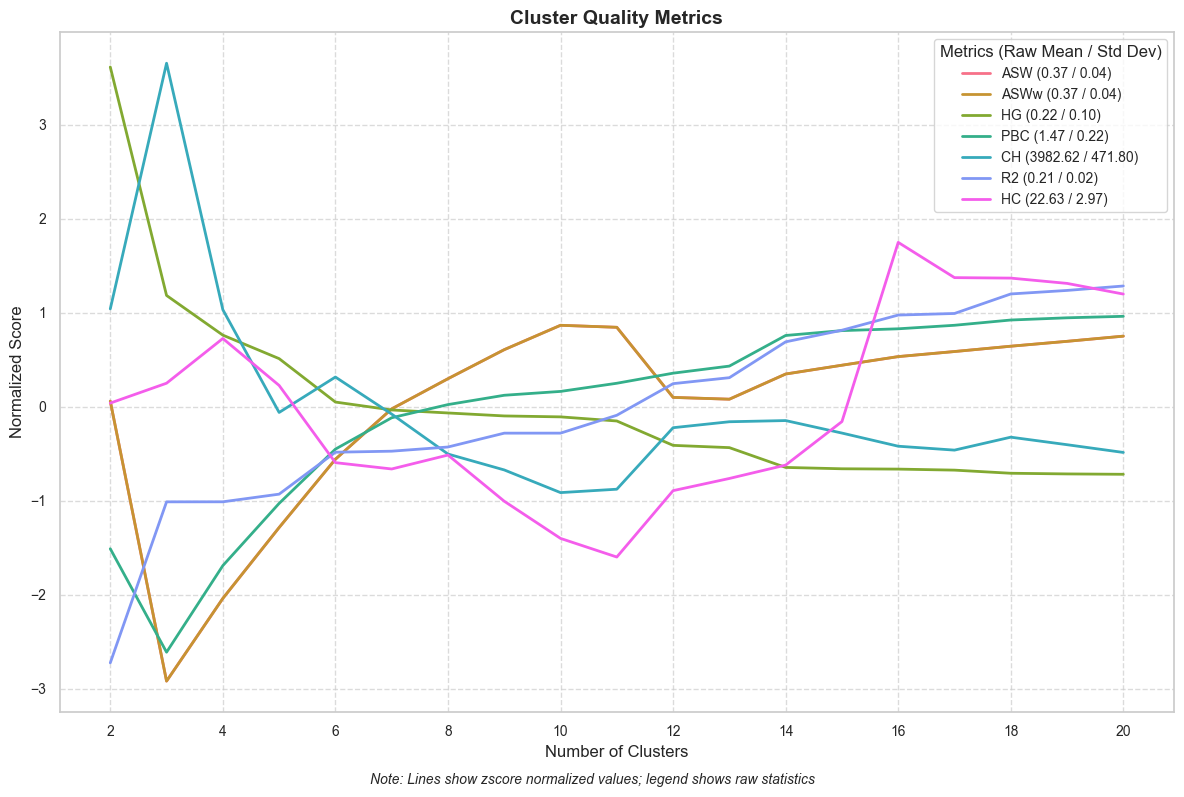

  Metric  Opt. Clusters  Opt. Value  Z-Score Norm.  Min-Max Norm.
0    ASW             10    0.864926       0.864926            1.0
1   ASWw             10    0.864926       0.864926            1.0
2     HG              2    3.613285       3.613285            1.0
3    PBC             20    0.960413       0.960413            1.0
4     CH              3    3.653405       3.653405            1.0
5     R2             20    1.283020       1.283020            1.0
6     HC             16    1.747171       1.747171            1.0


<Figure size 640x480 with 0 Axes>

In [9]:
import sys

old_limit = sys.getrecursionlimit()
sys.setrecursionlimit(25000)

cluster = Cluster(cat_distance_matrix, seniority_sequence.ids, clustering_method='ward')
# cluster.plot_dendrogram(xlabel="Graduates", ylabel="Distance")

# Create a ClusterQuality object to evaluate clustering quality
cluster_quality = ClusterQuality(cluster)
cluster_quality.compute_cluster_quality_scores()
cluster_quality.plot_combined_scores(norm='zscore', save_as='combined_scores')
summary_table = cluster_quality.get_metrics_table()
print(summary_table)

                           Entity ID  Cluster
0          dilip-kumar-nath-7538746a        6
1         vinodkumar-yadav-b7a976107        5
2           rajani-kulkarni-72674649        7
3               josh-slosson-07a1509        5
4      jonatthan-rodriguez-8a5612121        6
...                              ...      ...
32623                   edwardgu1915        7
32624        terry-ferguson-8060363a        5
32625       christy-garner-677894213        5
32626                jay-p-119369202        5
32627            brad-young-705385a0        2

[32628 rows x 2 columns]
   Cluster  Count  Percentage
0        1   2980        9.13
1        2   3011        9.23
2        3   1664        5.10
3        4   2597        7.96
4        5  11813       36.21
5        6   7325       22.45
6        7   3238        9.92


/Users/lei/Documents/Sequenzo_all_folders/Sequenzo-main/sequenzo/clustering/hierarchical_clustering.py:598: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Cluster', y='Count', data=distribution, palette='pastel')


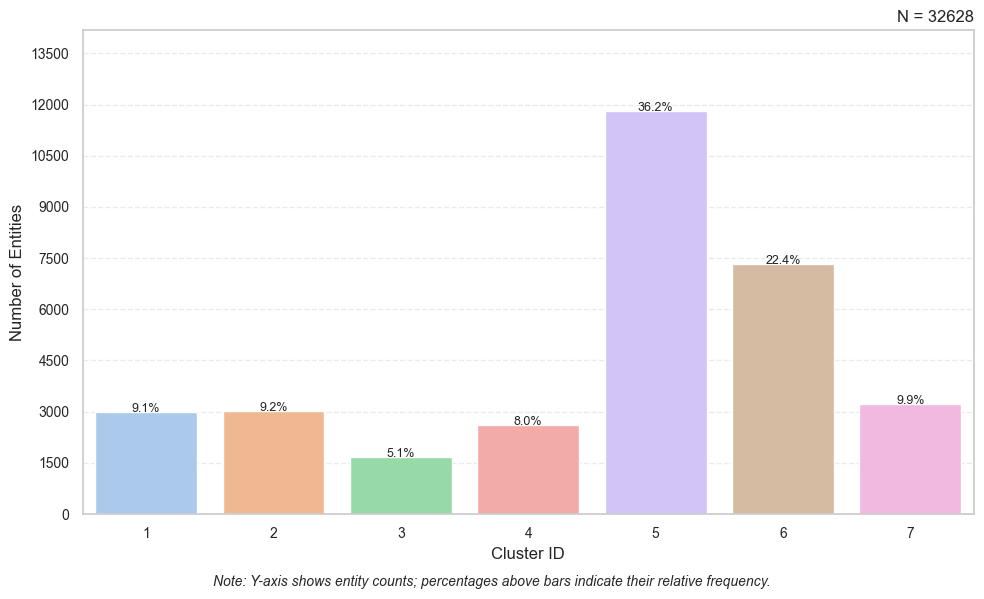

<Figure size 640x480 with 0 Axes>

In [17]:
cluster_results = ClusterResults(cluster)
cluster_7_membership_table = cluster_results.get_cluster_memberships(num_clusters=7)
print(cluster_7_membership_table)
distribution = cluster_results.get_cluster_distribution(num_clusters=7)
print(distribution)
cluster_results.plot_cluster_distribution(num_clusters=7, save_as="cluster_7_distribution.png", title=None)


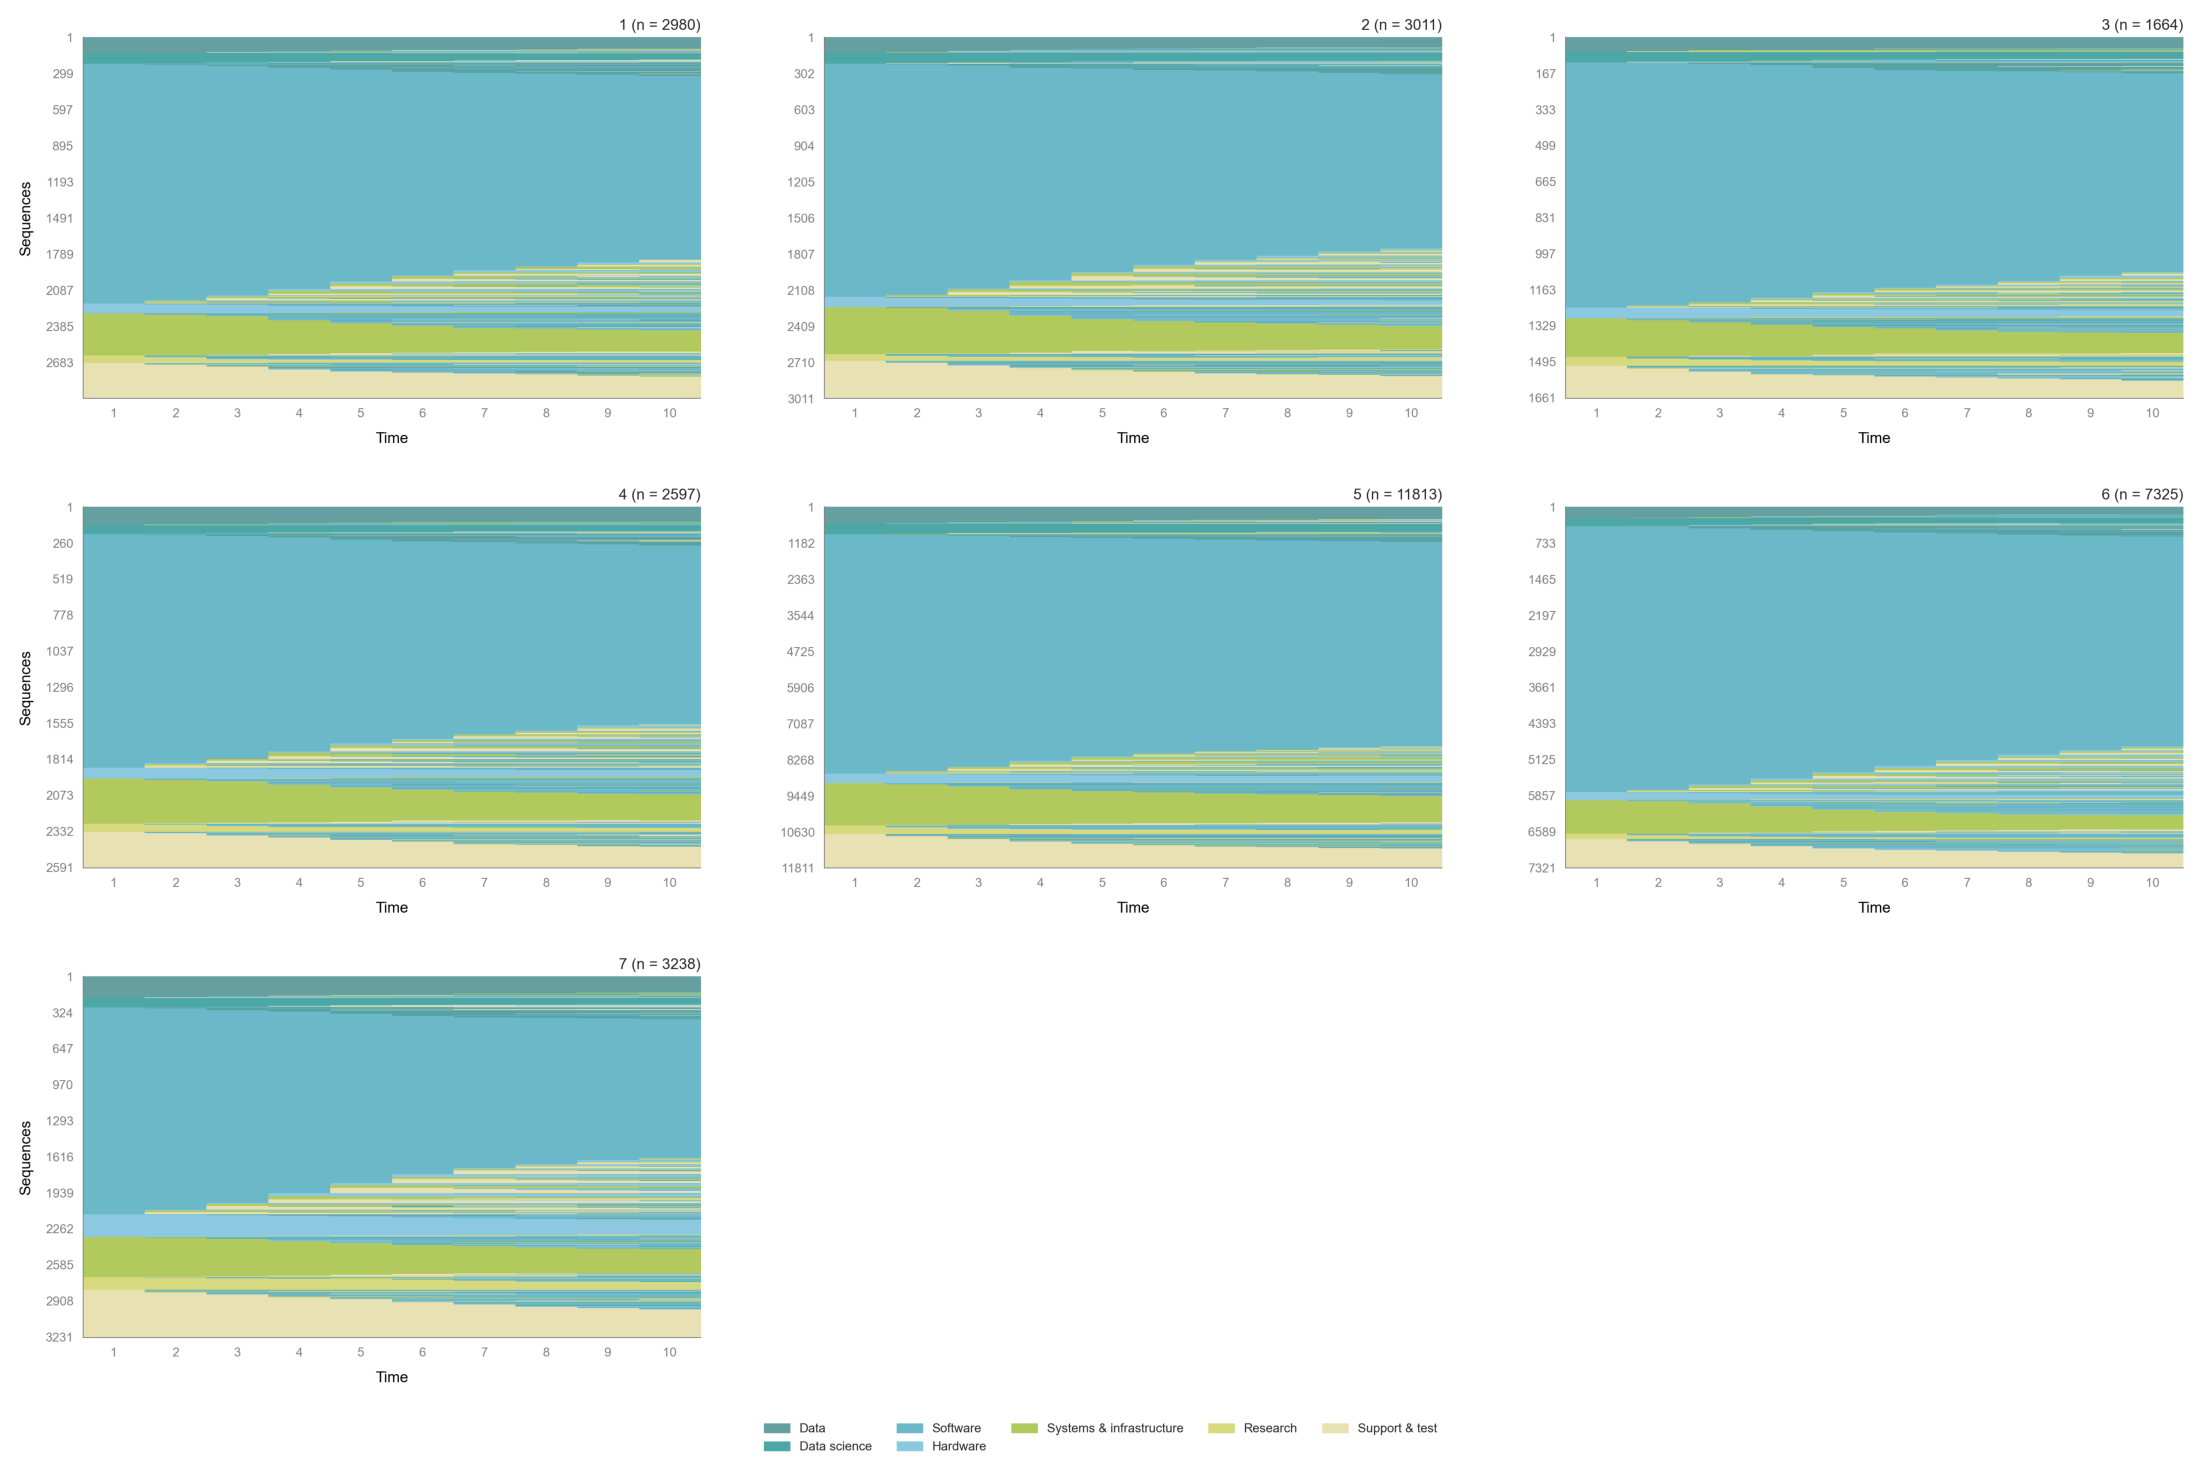

In [18]:
plot_sequence_index(seqdata=occupation_sequence,
                    id_group_df=cluster_7_membership_table,
                    categories='Cluster',
                    save_as='cluster_7_index_plot_occupation')

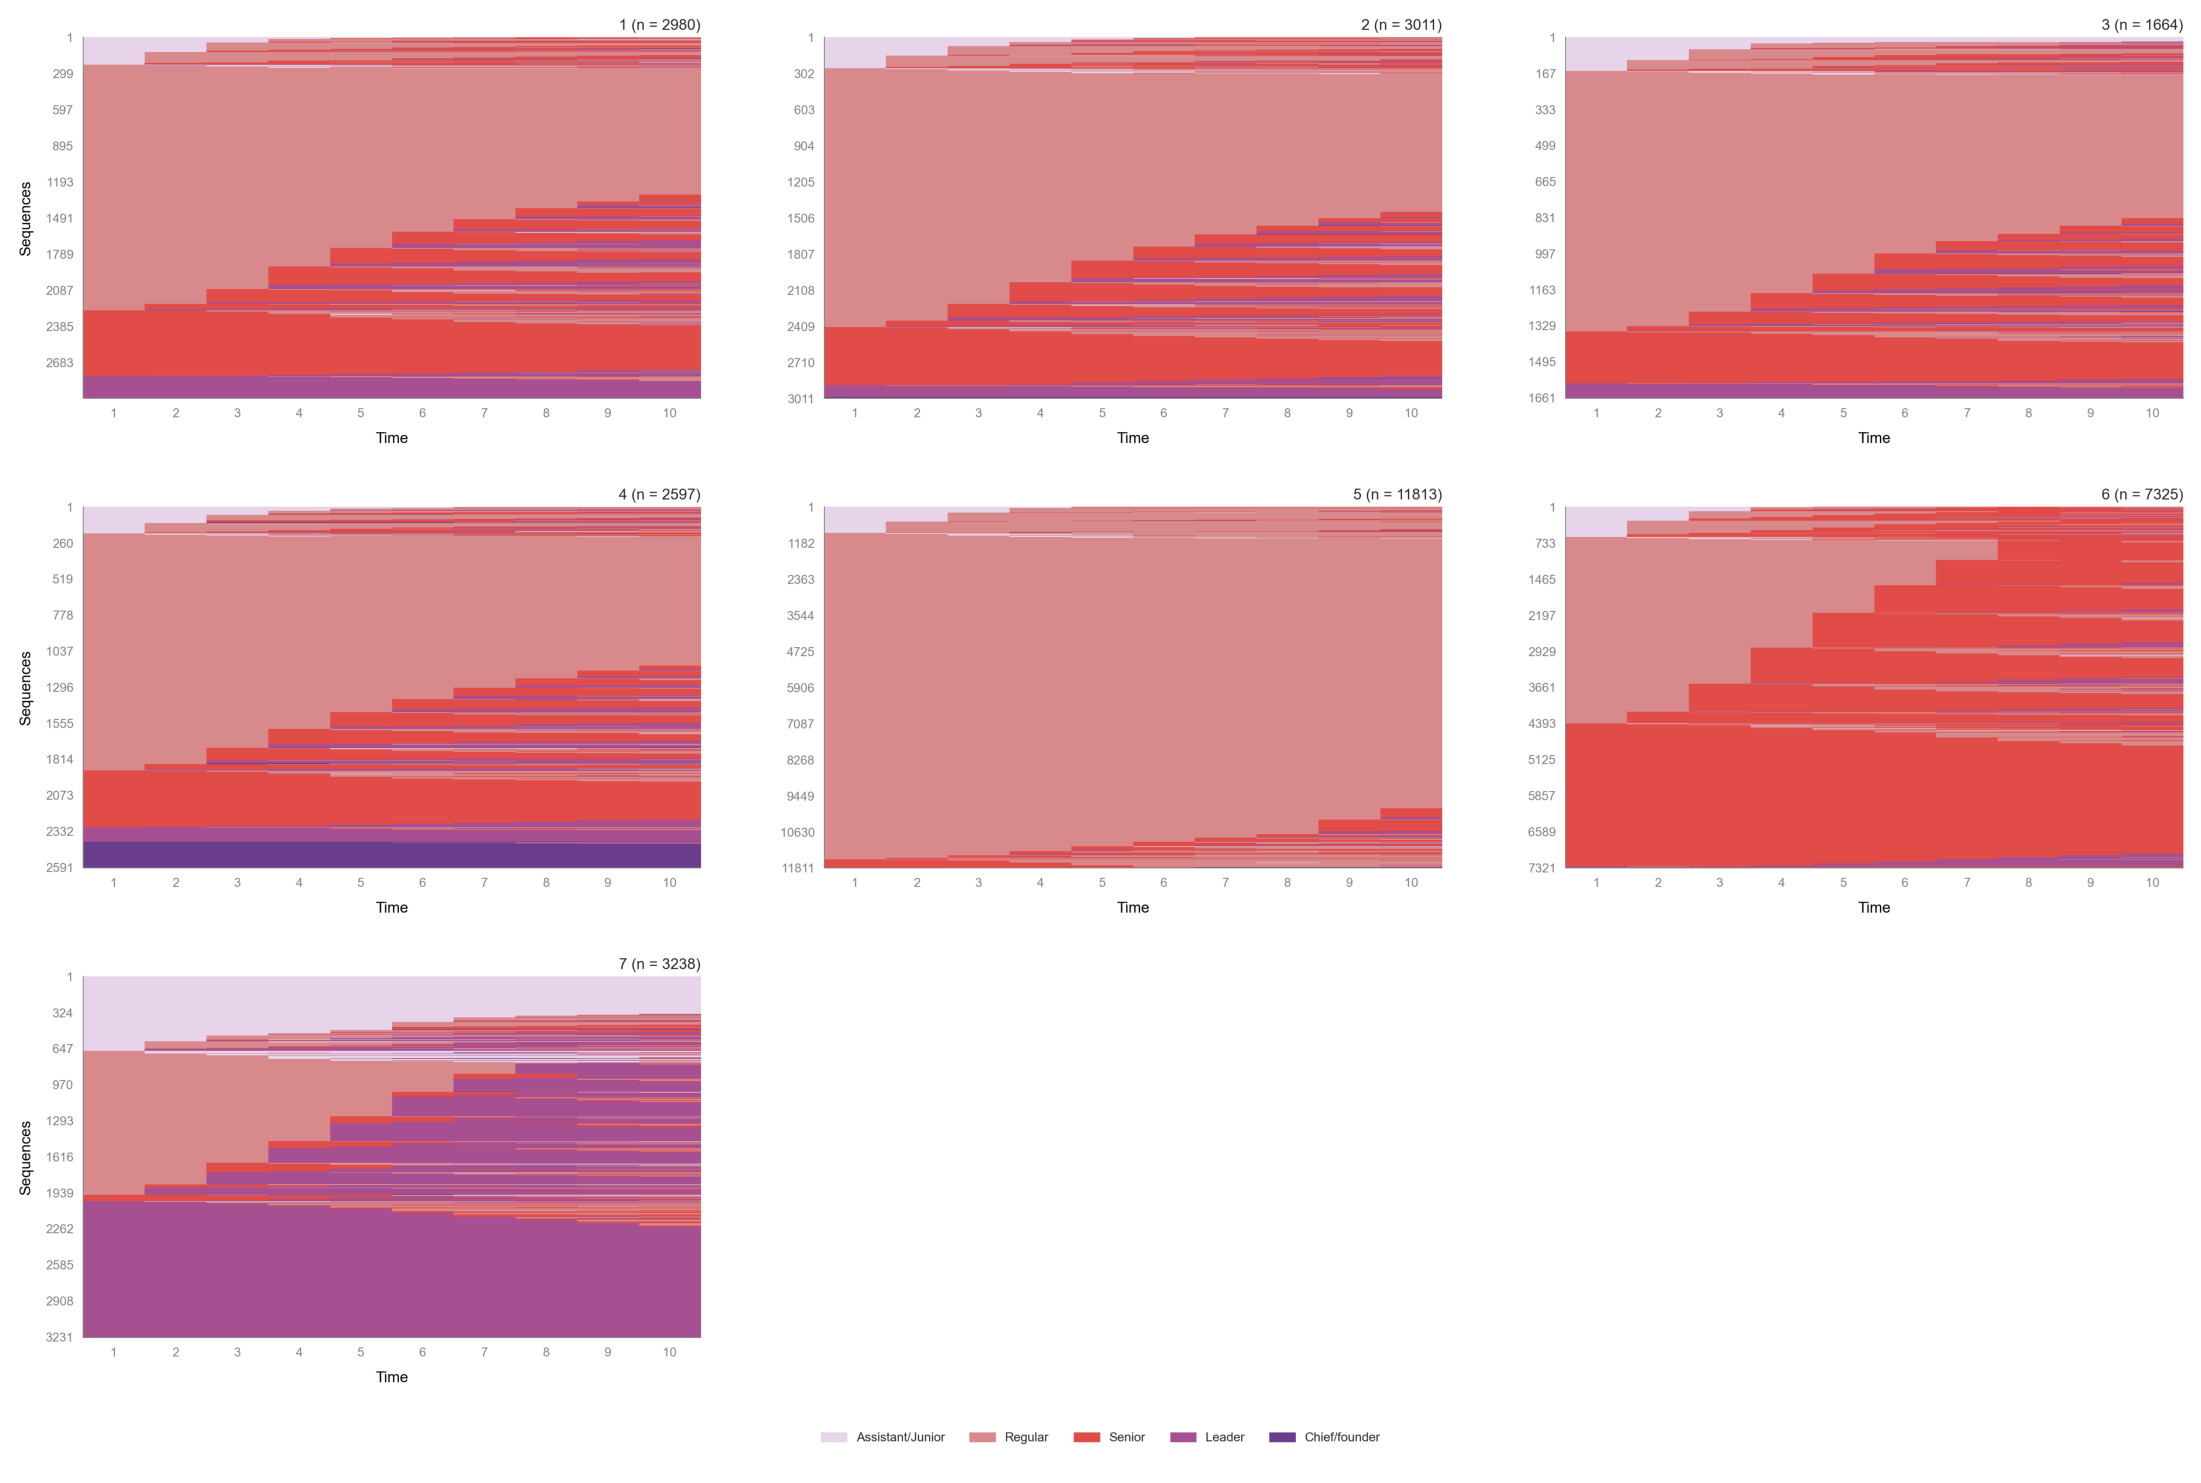

In [19]:
plot_sequence_index(seqdata=seniority_sequence,
                    id_group_df=cluster_7_membership_table,
                    categories='Cluster',
                    save_as='cluster_7_index_plot_seniority')

Seniority level only

In [20]:
# You can also replace "OMspell" with "OM/DHD/HAM" and "TRATE" with "CONSTANT"
om = get_distance_matrix(seqdata=seniority_sequence,
                         method='OM',
                         sm="CONSTANT",
                         indel=1)
om

[>] Processing 32628 sequences with 5 unique states.
  - Creating 6x6 substitution-cost matrix using 2 as constant value
[>] Indel cost generated.

[>] Identified 1745 unique sequences.
[>] Starting Optimal Matching(OM)...
[>] Computing all pairwise distances...
[>] Computed Successfully.


,dilip-kumar-nath-7538746a,vinodkumar-yadav-b7a976107,rajani-kulkarni-72674649,josh-slosson-07a1509,jonatthan-rodriguez-8a5612121,visalakshi-papana-41443054,jeenesh-jyothindran-8ba28818,sudheer-kumar-75834285,regan-felix-l,vinod-chavan-6ab338ab,...,mcdowellstl,anton-zvonovsky-734ab59b,praveen-k-a19b67265,john-simon-93a14a114,avinash-radhakrishnan-2519819a,edwardgu1915,terry-ferguson-8060363a,christy-garner-677894213,jay-p-119369202,brad-young-705385a0
dilip-kumar-nath-7538746a,0.0,12.0,12.0,12.0,4.0,12.0,8.0,0.0,6.0,8.0,...,8.0,12.0,8.0,12.0,8.0,12.0,12.0,12.0,12.0,8.0
vinodkumar-yadav-b7a976107,12.0,0.0,4.0,0.0,16.0,0.0,20.0,12.0,6.0,8.0,...,20.0,2.0,4.0,6.0,8.0,18.0,0.0,0.0,0.0,18.0
rajani-kulkarni-72674649,12.0,4.0,0.0,4.0,16.0,4.0,20.0,12.0,6.0,4.0,...,20.0,4.0,4.0,6.0,8.0,14.0,4.0,4.0,4.0,14.0
josh-slosson-07a1509,12.0,0.0,4.0,0.0,16.0,0.0,20.0,12.0,6.0,8.0,...,20.0,2.0,4.0,6.0,8.0,18.0,0.0,0.0,0.0,18.0
jonatthan-rodriguez-8a5612121,4.0,16.0,16.0,16.0,0.0,16.0,4.0,4.0,10.0,12.0,...,4.0,16.0,12.0,14.0,12.0,12.0,16.0,16.0,16.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
edwardgu1915,12.0,18.0,14.0,18.0,12.0,18.0,12.0,12.0,14.0,16.0,...,12.0,18.0,16.0,12.0,16.0,0.0,18.0,18.0,18.0,12.0
terry-ferguson-8060363a,12.0,0.0,4.0,0.0,16.0,0.0,20.0,12.0,6.0,8.0,...,20.0,2.0,4.0,6.0,8.0,18.0,0.0,0.0,0.0,18.0
christy-garner-677894213,12.0,0.0,4.0,0.0,16.0,0.0,20.0,12.0,6.0,8.0,...,20.0,2.0,4.0,6.0,8.0,18.0,0.0,0.0,0.0,18.0
jay-p-119369202,12.0,0.0,4.0,0.0,16.0,0.0,20.0,12.0,6.0,8.0,...,20.0,2.0,4.0,6.0,8.0,18.0,0.0,0.0,0.0,18.0


[>] Converting DataFrame to NumPy array...


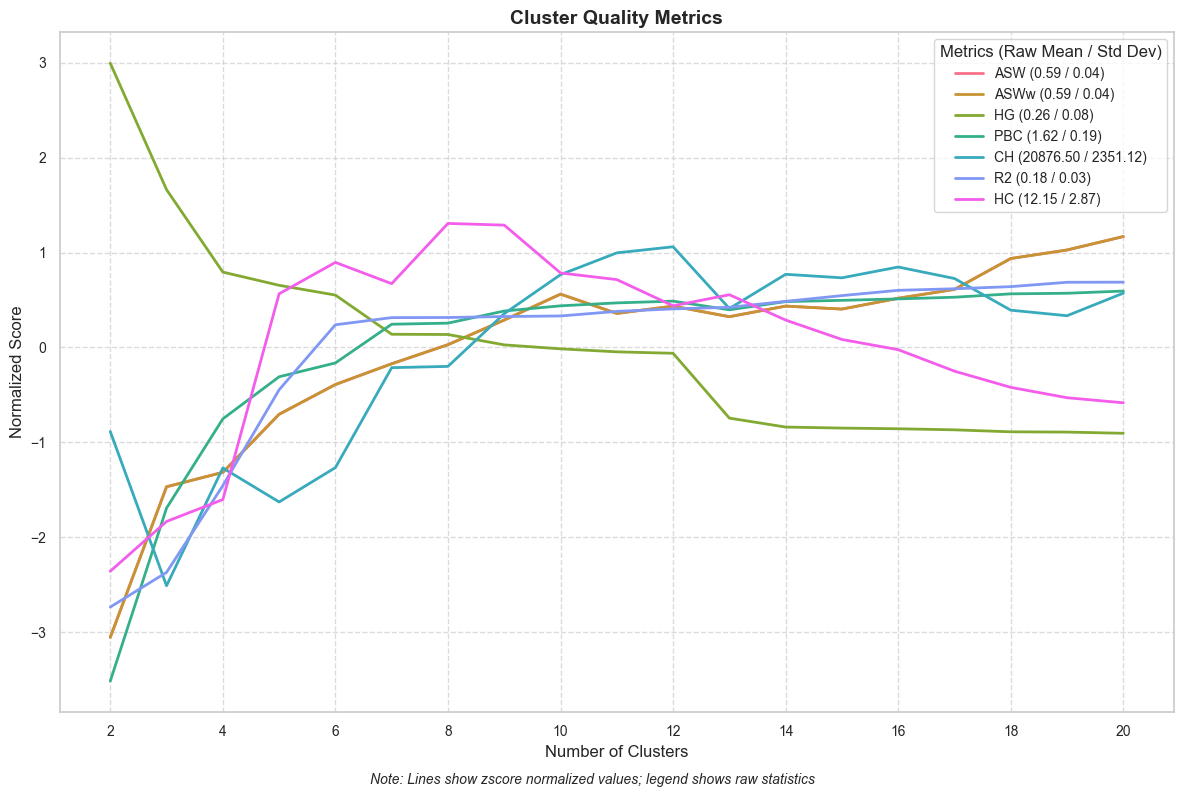

  Metric  Opt. Clusters  Opt. Value  Z-Score Norm.  Min-Max Norm.
0    ASW             20    1.168449       1.168449            1.0
1   ASWw             20    1.168449       1.168449            1.0
2     HG              2    2.994020       2.994020            1.0
3    PBC             20    0.594195       0.594195            1.0
4     CH             12    1.060635       1.060635            1.0
5     R2             20    0.687855       0.687855            1.0
6     HC              8    1.306602       1.306602            1.0


<Figure size 640x480 with 0 Axes>

In [21]:
import sys

old_limit = sys.getrecursionlimit()
sys.setrecursionlimit(25000)

cluster = Cluster(om, seniority_sequence.ids, clustering_method='ward')
# cluster.plot_dendrogram(xlabel="Graduates", ylabel="Distance")

# Create a ClusterQuality object to evaluate clustering quality
cluster_quality = ClusterQuality(cluster)
cluster_quality.compute_cluster_quality_scores()
cluster_quality.plot_combined_scores(norm='zscore', save_as='combined_scores')
summary_table = cluster_quality.get_metrics_table()
print(summary_table)

                           Entity ID  Cluster
0          dilip-kumar-nath-7538746a        7
1         vinodkumar-yadav-b7a976107        1
2           rajani-kulkarni-72674649        1
3               josh-slosson-07a1509        1
4      jonatthan-rodriguez-8a5612121        7
...                              ...      ...
32623                   edwardgu1915        7
32624        terry-ferguson-8060363a        1
32625       christy-garner-677894213        1
32626                jay-p-119369202        1
32627            brad-young-705385a0        3

[32628 rows x 2 columns]
   Cluster  Count  Percentage
0        1  14955       45.83
1        2   1663        5.10
2        3   2696        8.26
3        4   4112       12.60
4        5    237        0.73
5        6    478        1.46
6        7   4094       12.55
7        8   4393       13.46


/Users/lei/Documents/Sequenzo_all_folders/Sequenzo-main/sequenzo/clustering/hierarchical_clustering.py:598: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Cluster', y='Count', data=distribution, palette='pastel')


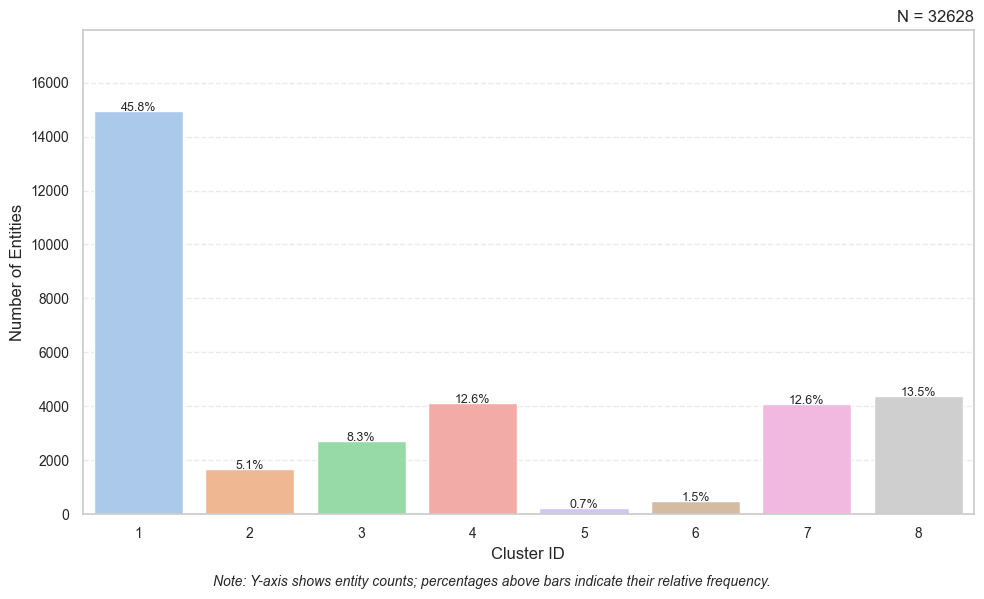

<Figure size 640x480 with 0 Axes>

In [22]:
cluster_results = ClusterResults(cluster)
cluster_8_membership_table = cluster_results.get_cluster_memberships(num_clusters=8)
print(cluster_8_membership_table)
distribution = cluster_results.get_cluster_distribution(num_clusters=8)
print(distribution)
cluster_results.plot_cluster_distribution(num_clusters=8, save_as="cluster_8_distribution.png", title=None)


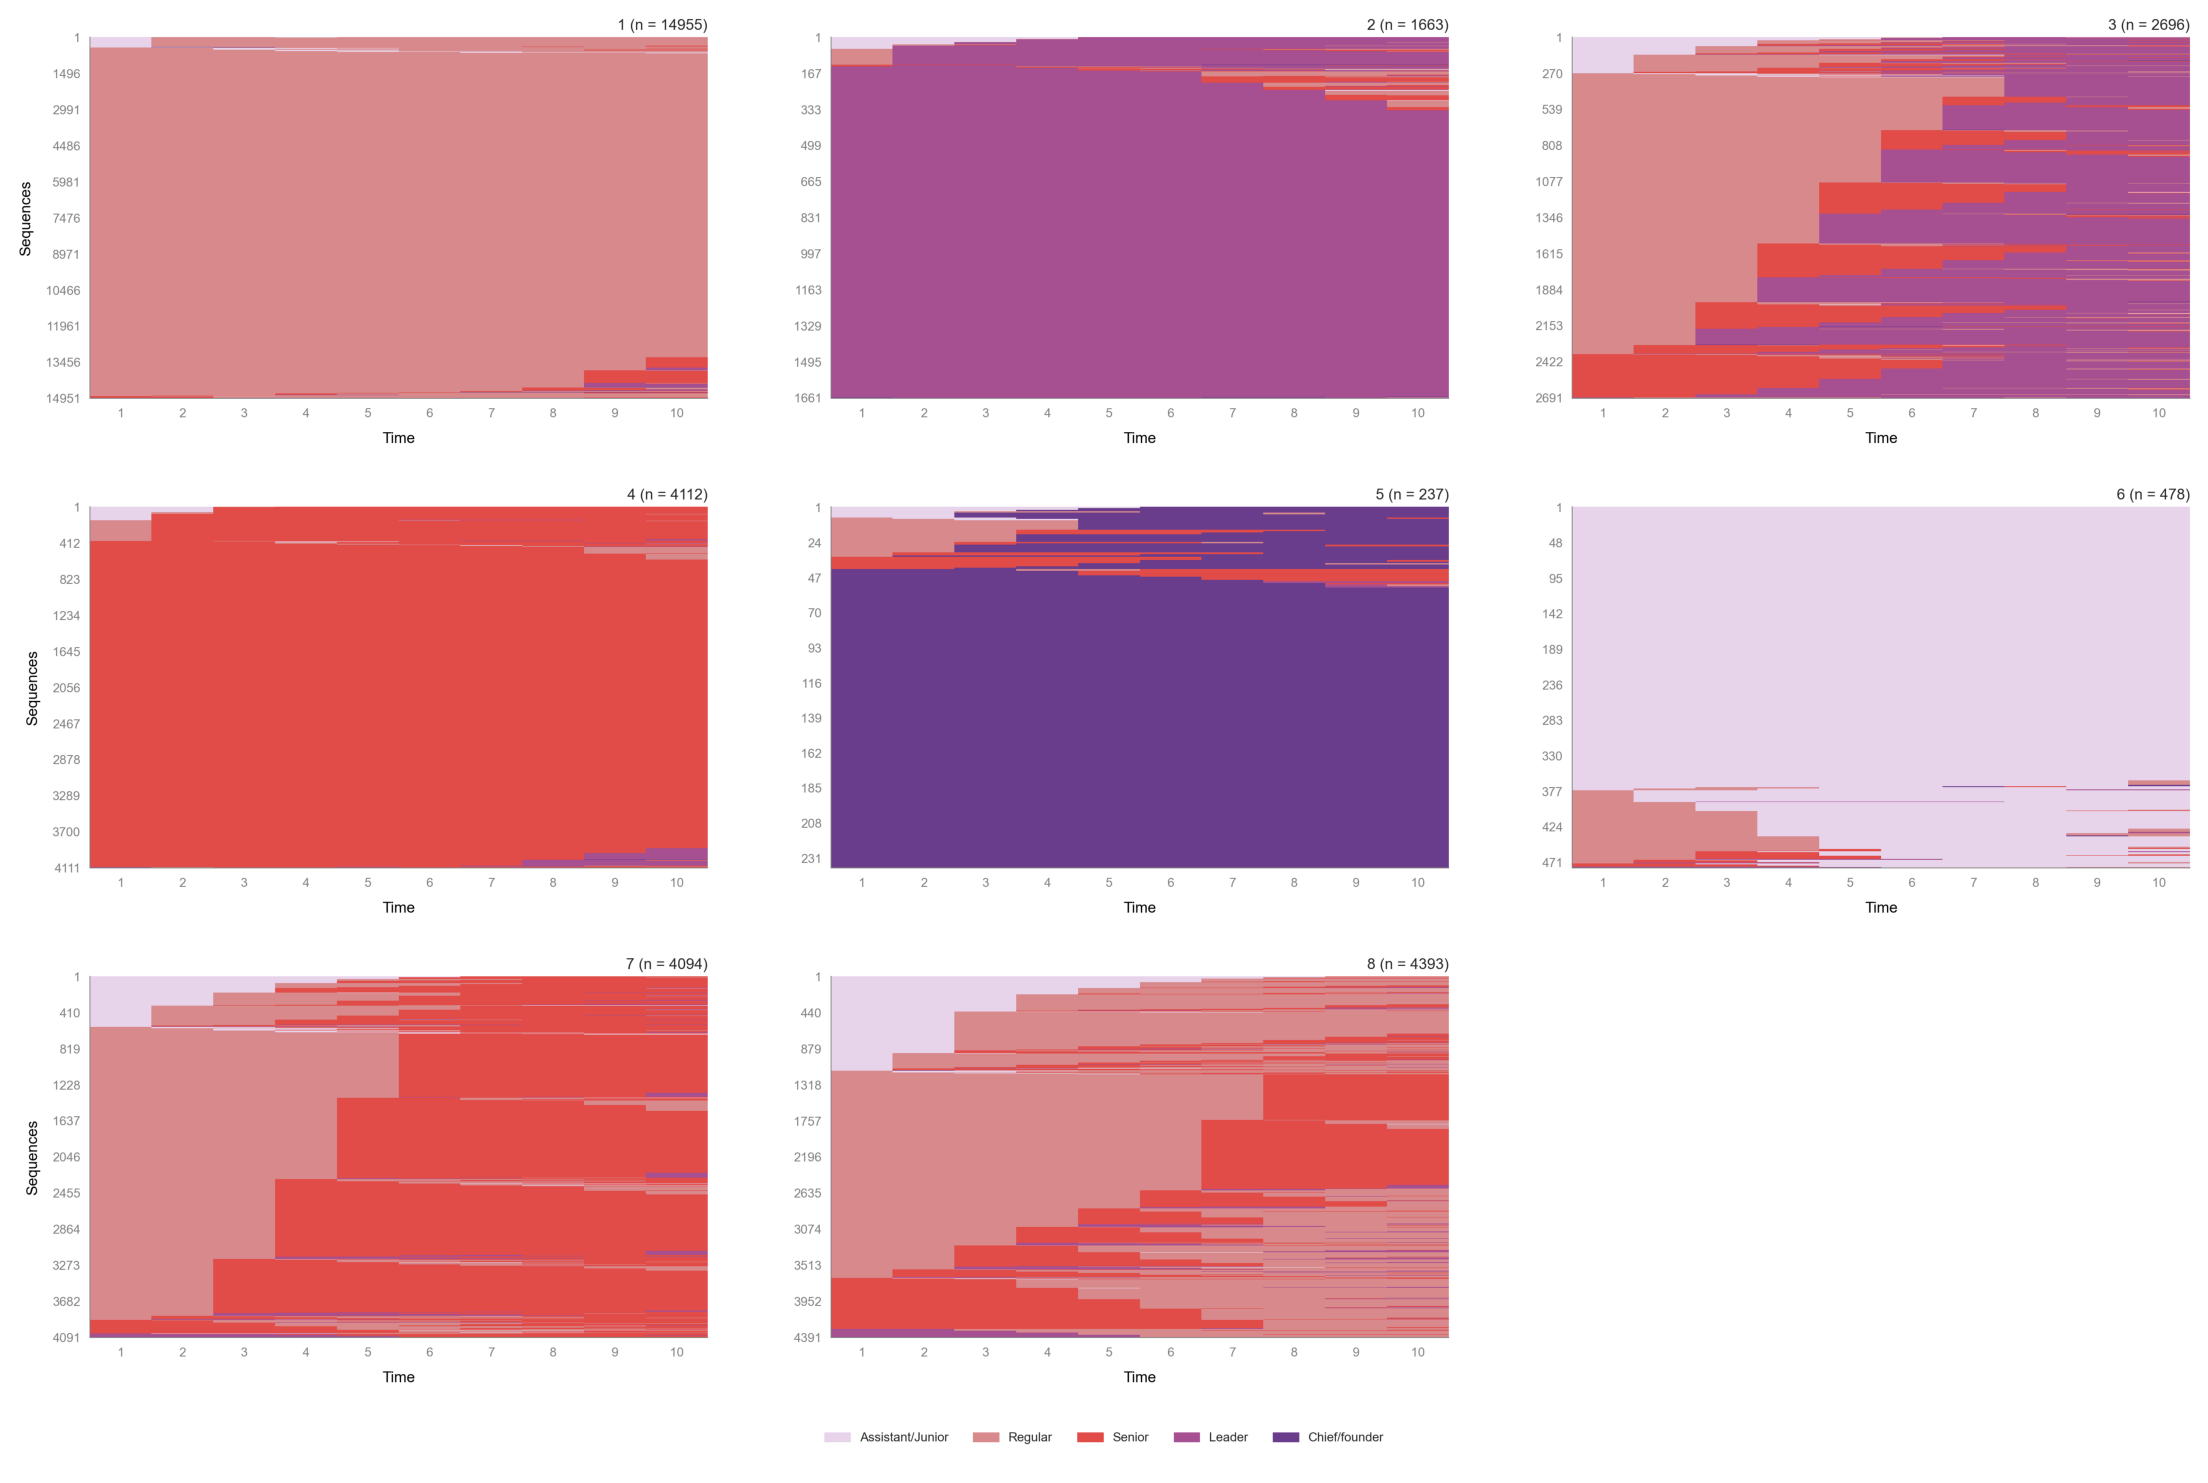

In [23]:
plot_sequence_index(seqdata=seniority_sequence,
                    id_group_df=cluster_8_membership_table,
                    categories='Cluster',
                    save_as='cluster_8_index_plot_seniority')

## TODO: Change the name of each cluster and then make the graph again

In [ ]:
# change the name of each cluster in cluster_8_membership_table

## 9 clusters

                           Entity ID  Cluster
0          dilip-kumar-nath-7538746a        7
1         vinodkumar-yadav-b7a976107        1
2           rajani-kulkarni-72674649        1
3               josh-slosson-07a1509        1
4      jonatthan-rodriguez-8a5612121        7
...                              ...      ...
32623                   edwardgu1915        7
32624        terry-ferguson-8060363a        1
32625       christy-garner-677894213        1
32626                jay-p-119369202        1
32627            brad-young-705385a0        3

[32628 rows x 2 columns]
   Cluster  Count  Percentage
0        1  14955       45.83
1        2   1663        5.10
2        3   2696        8.26
3        4   4112       12.60
4        5    237        0.73
5        6    478        1.46
6        7   4094       12.55
7        8   1947        5.97
8        9   2446        7.50


/Users/lei/Documents/Sequenzo_all_folders/Sequenzo-main/sequenzo/clustering/hierarchical_clustering.py:598: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Cluster', y='Count', data=distribution, palette='pastel')


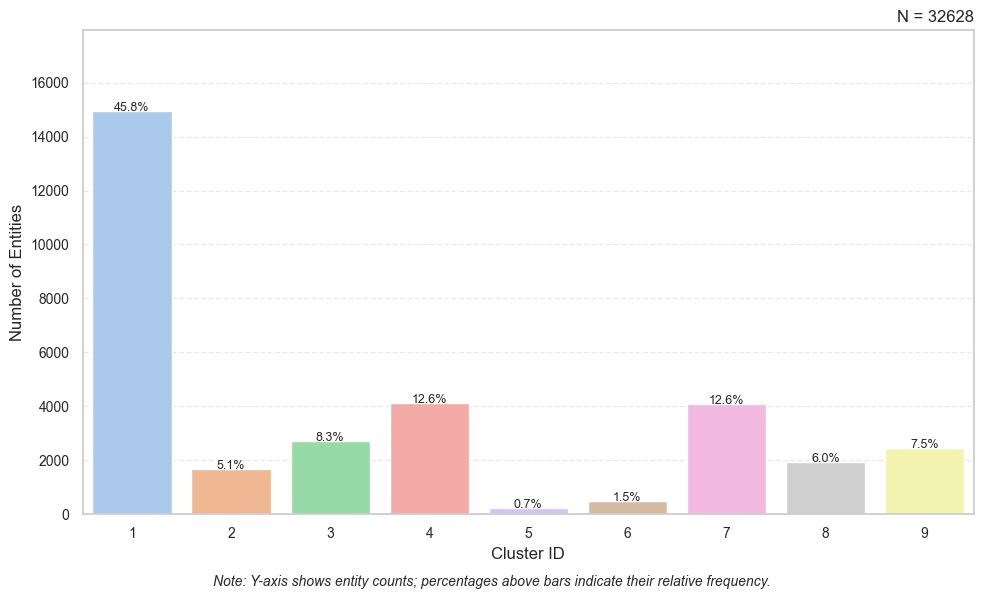

<Figure size 640x480 with 0 Axes>

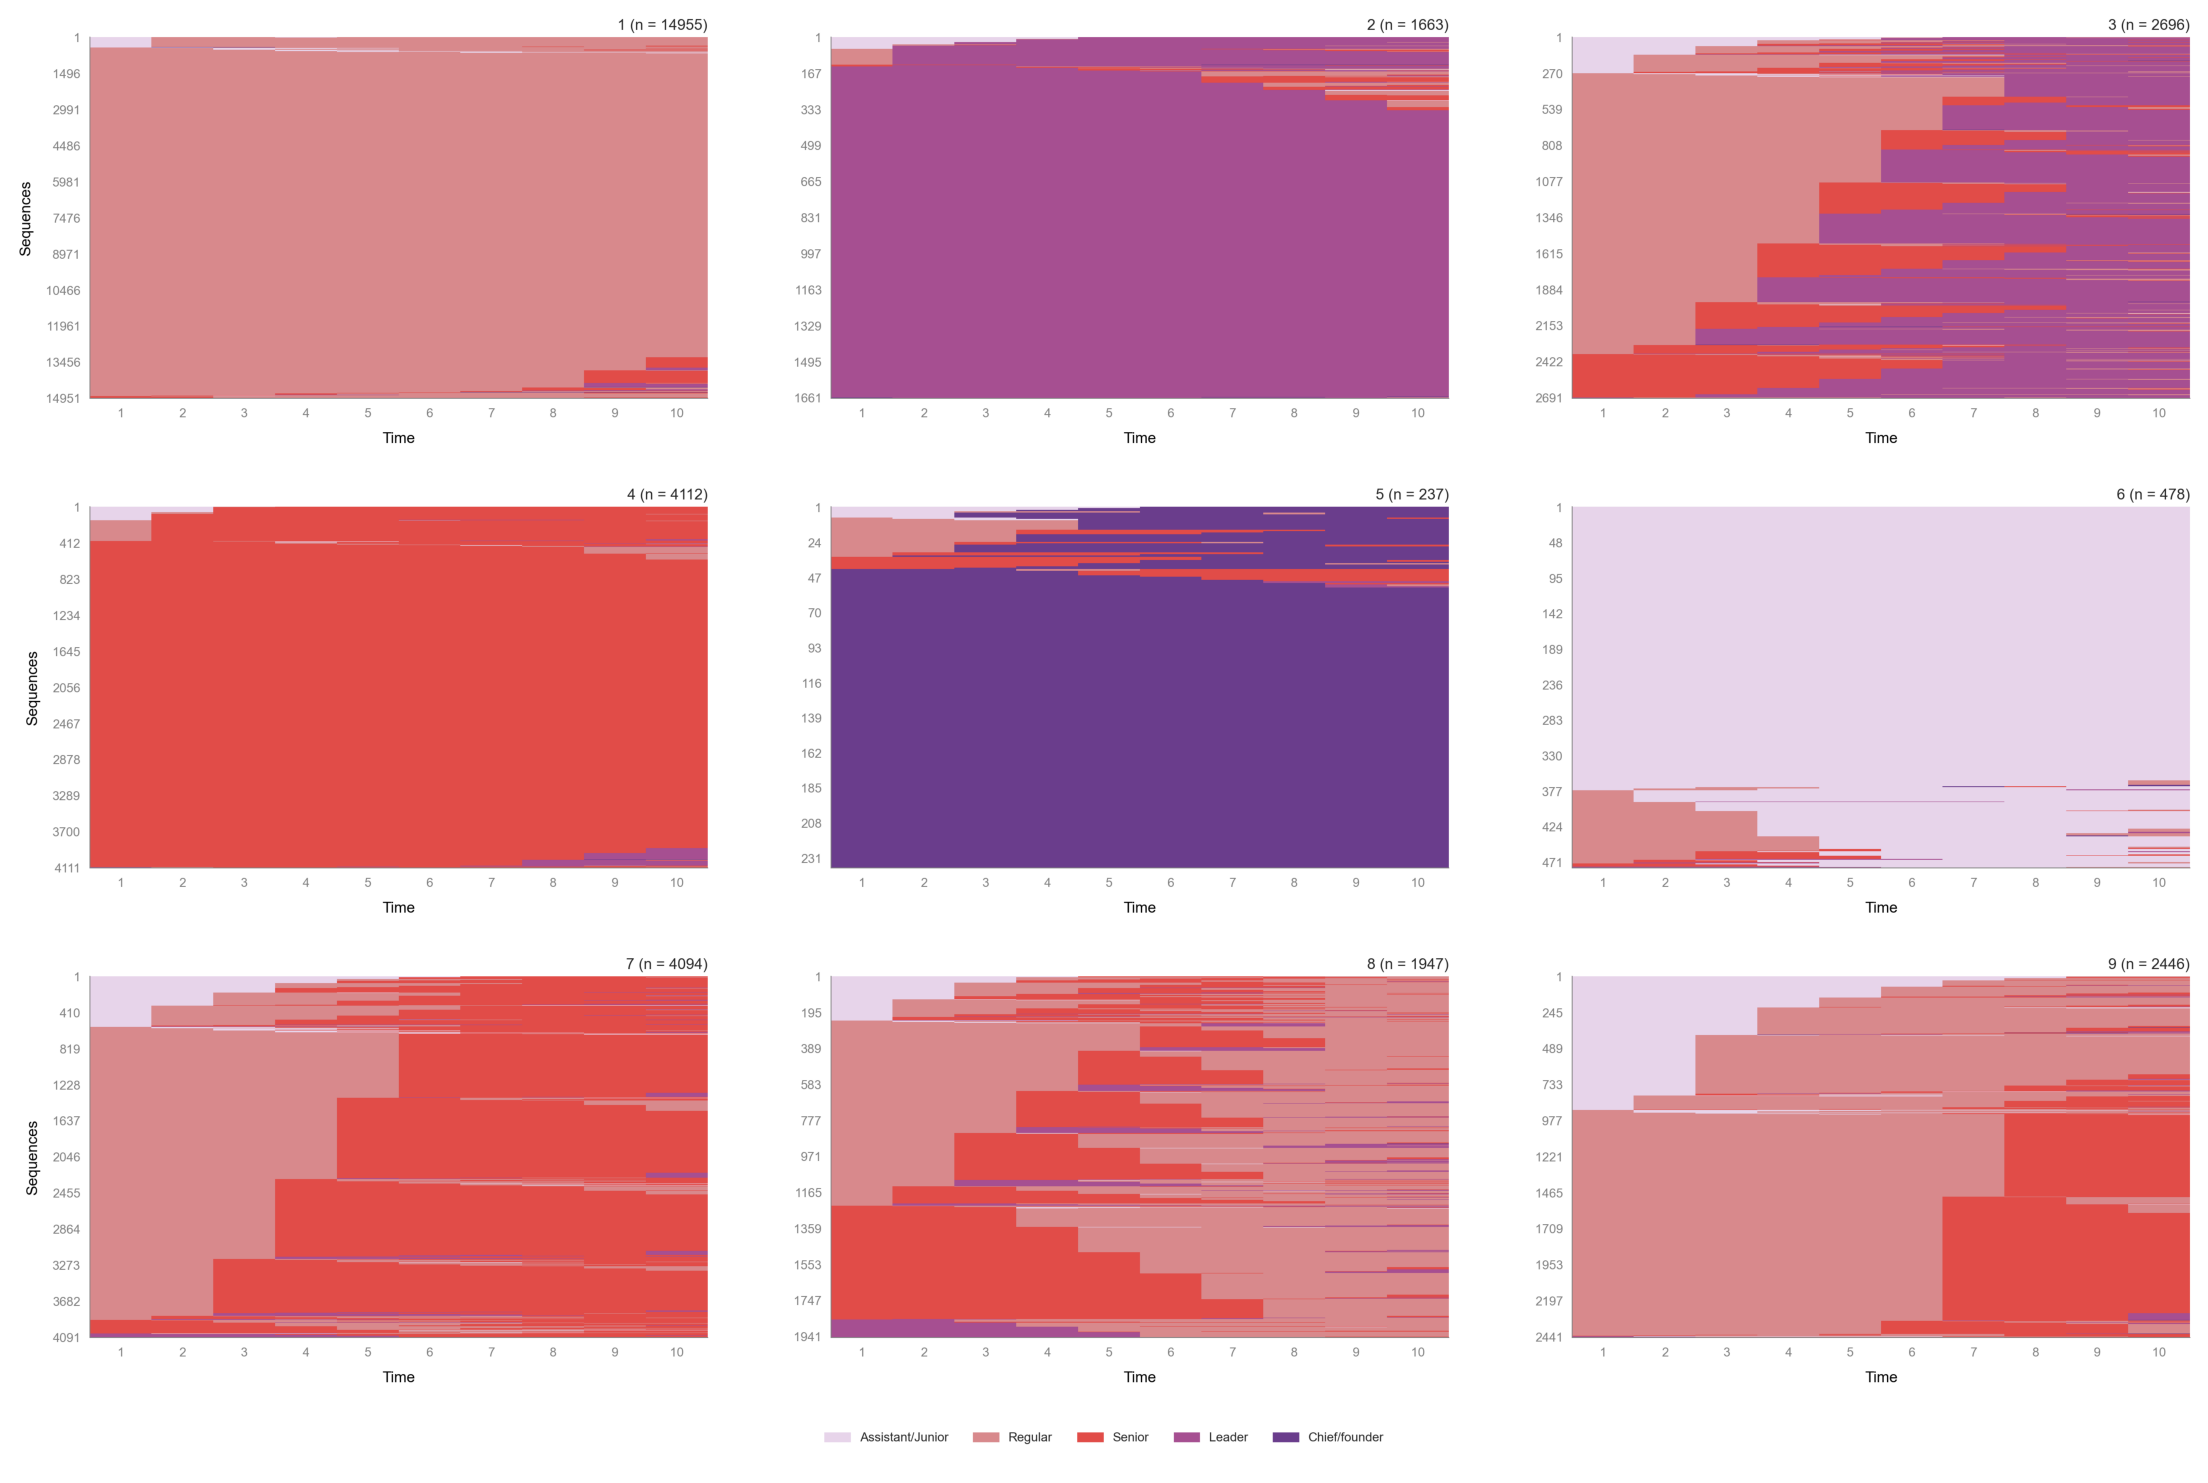

In [41]:
cluster_results = ClusterResults(cluster)
cluster_9_membership_table = cluster_results.get_cluster_memberships(num_clusters=9)
print(cluster_9_membership_table)
distribution = cluster_results.get_cluster_distribution(num_clusters=9)
print(distribution)
cluster_results.plot_cluster_distribution(num_clusters=9, save_as="cluster_9_distribution.png", title=None)

plot_sequence_index(seqdata=seniority_sequence,
                    id_group_df=cluster_9_membership_table,
                    categories='Cluster',
                    save_as='cluster_9_index_plot_seniority')


## 10 clusters

                           Entity ID  Cluster
0          dilip-kumar-nath-7538746a        8
1         vinodkumar-yadav-b7a976107        1
2           rajani-kulkarni-72674649        1
3               josh-slosson-07a1509        1
4      jonatthan-rodriguez-8a5612121        8
...                              ...      ...
32623                   edwardgu1915        8
32624        terry-ferguson-8060363a        1
32625       christy-garner-677894213        1
32626                jay-p-119369202        1
32627            brad-young-705385a0        3

[32628 rows x 2 columns]
   Cluster  Count  Percentage
0        1  14955       45.83
1        2   1663        5.10
2        3   1323        4.05
3        4   1373        4.21
4        5   4112       12.60
5        6    237        0.73
6        7    478        1.46
7        8   4094       12.55
8        9   1947        5.97
9       10   2446        7.50


/Users/lei/Documents/Sequenzo_all_folders/Sequenzo-main/sequenzo/clustering/hierarchical_clustering.py:598: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Cluster', y='Count', data=distribution, palette='pastel')


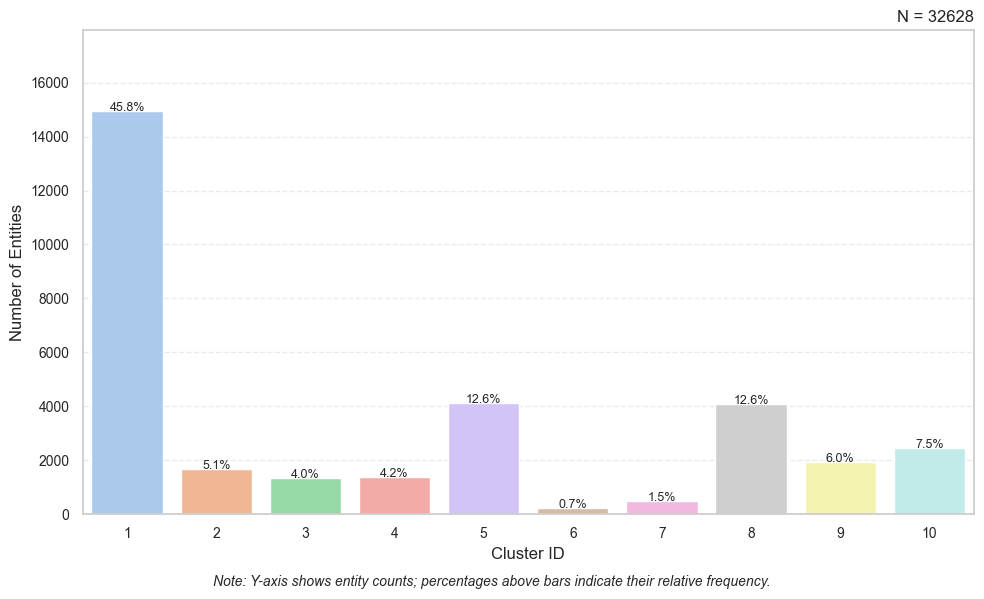

<Figure size 640x480 with 0 Axes>

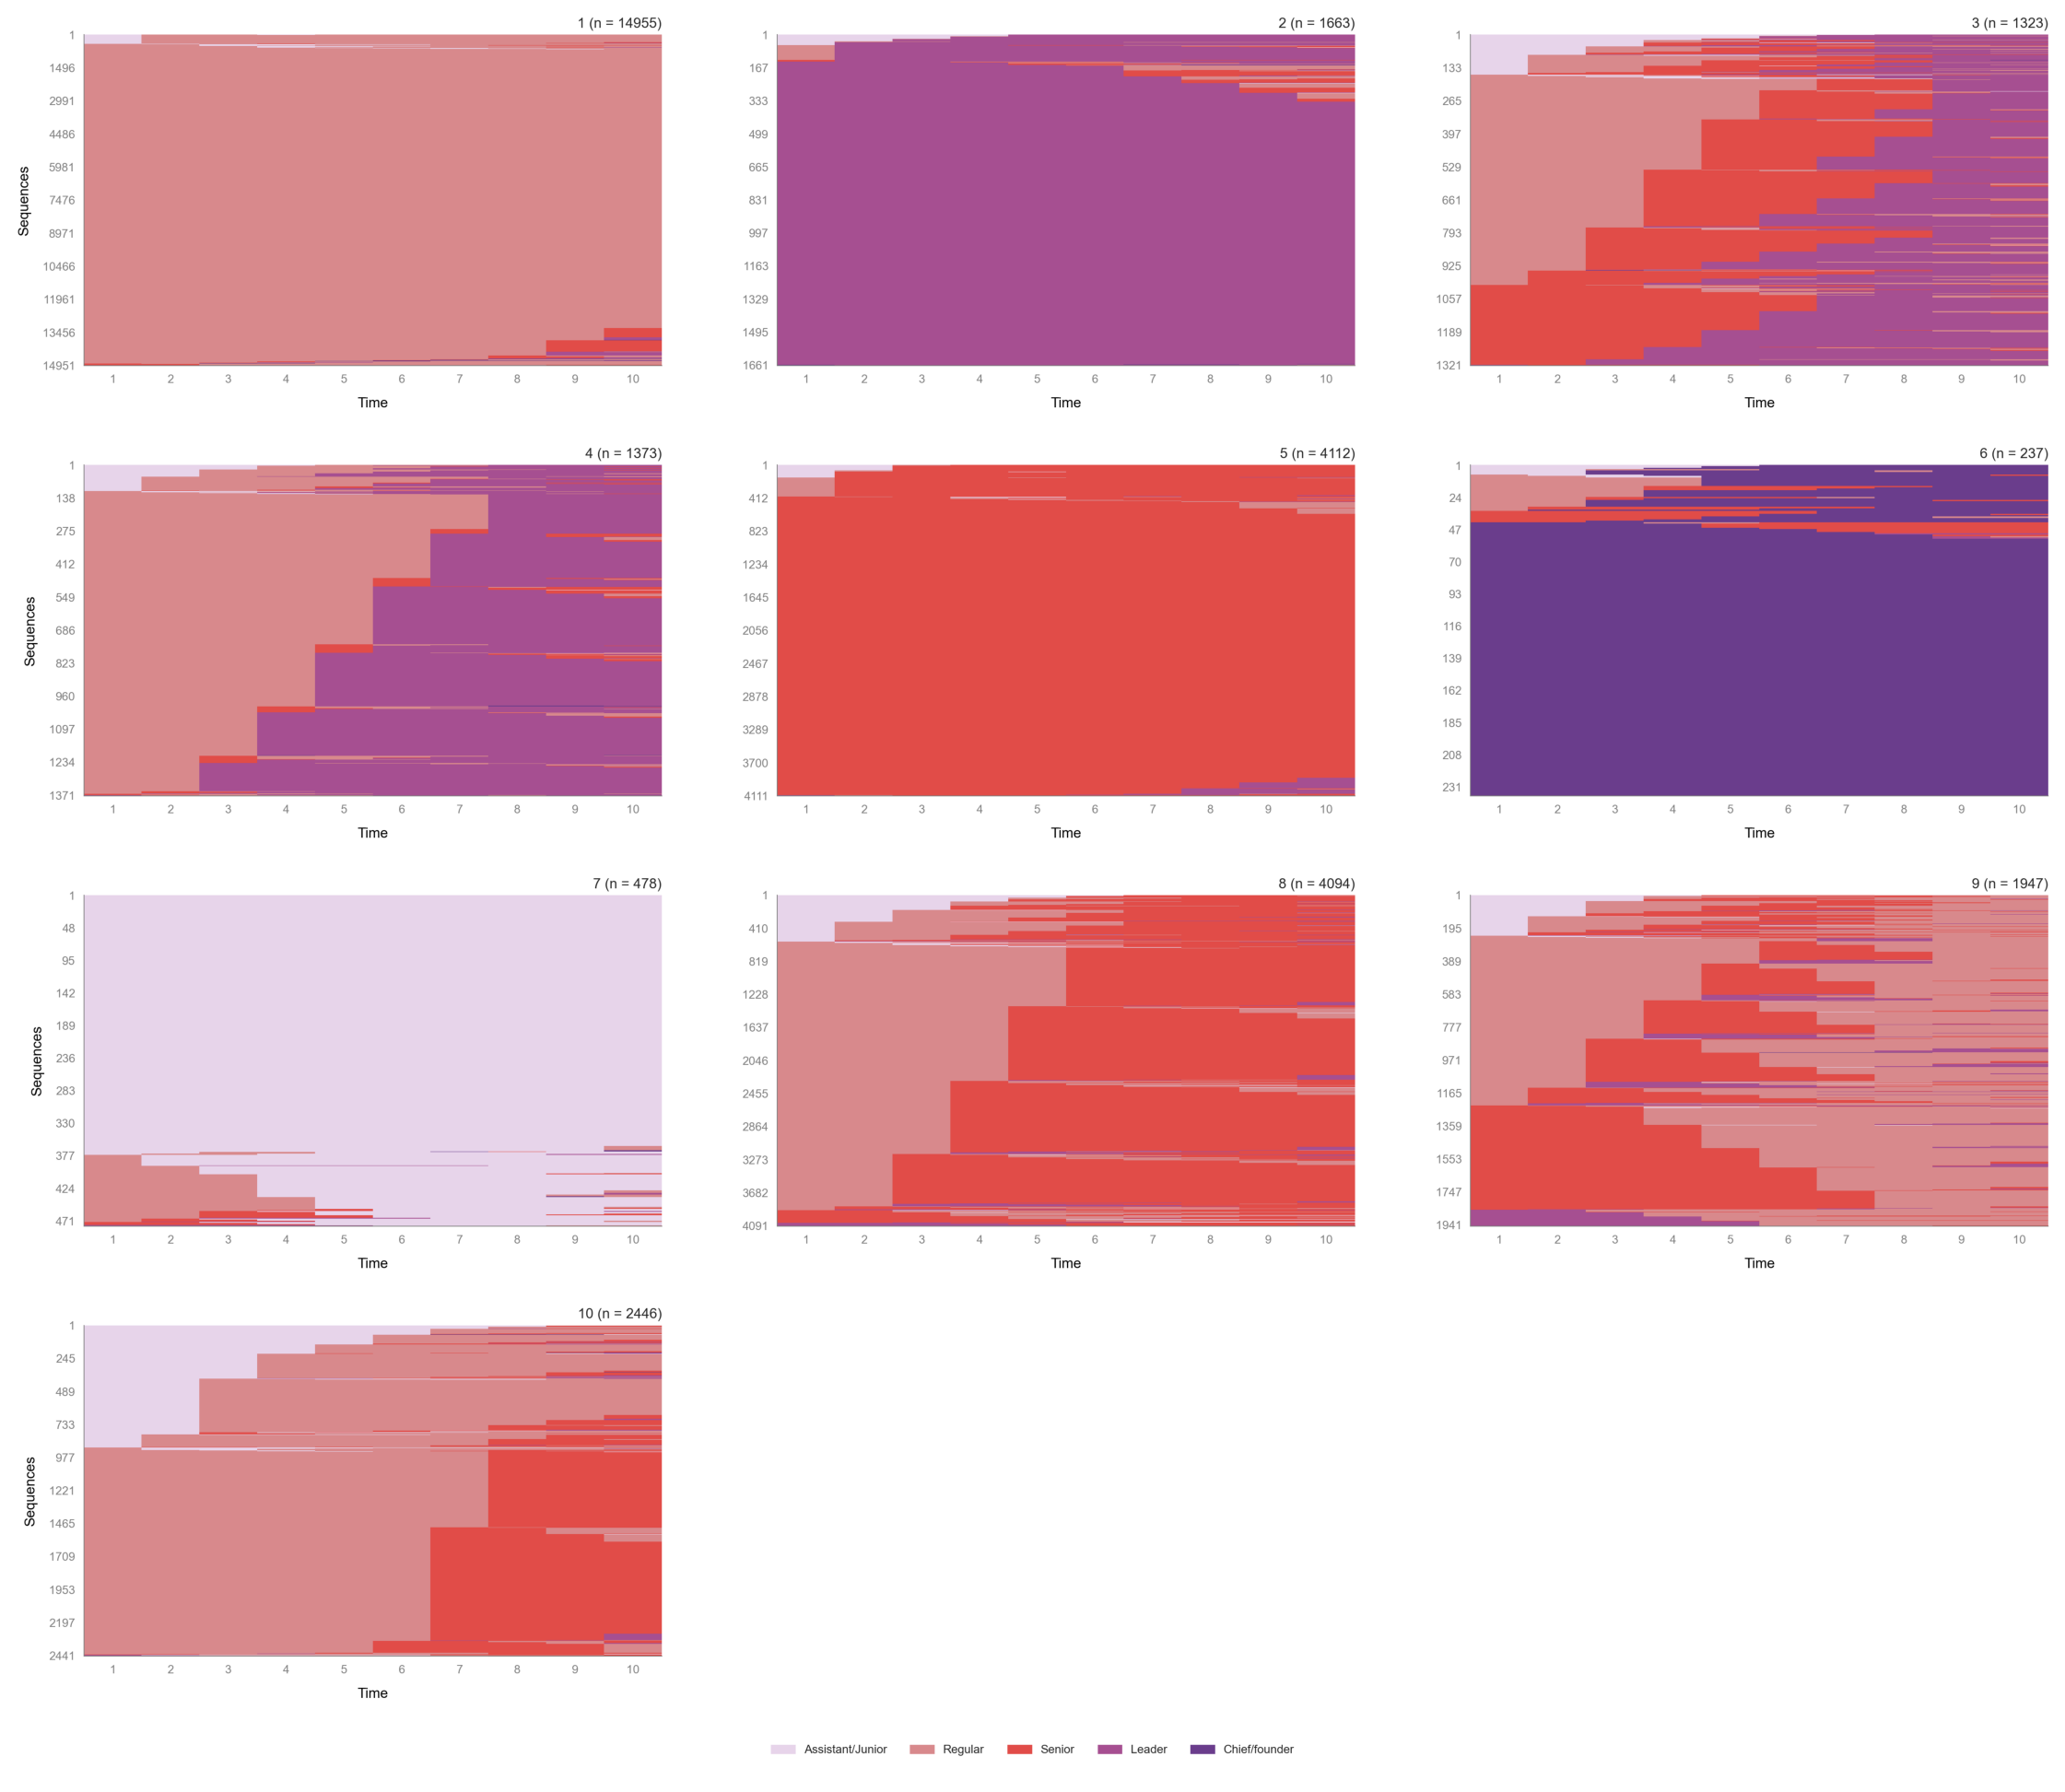

In [42]:
cluster_results = ClusterResults(cluster)
cluster_10_membership_table = cluster_results.get_cluster_memberships(num_clusters=10)
print(cluster_10_membership_table)
distribution = cluster_results.get_cluster_distribution(num_clusters=10)
print(distribution)
cluster_results.plot_cluster_distribution(num_clusters=10, save_as="cluster_10_distribution.png", title=None)

plot_sequence_index(seqdata=seniority_sequence,
                    id_group_df=cluster_10_membership_table,
                    categories='Cluster',
                    save_as='cluster_10_index_plot_seniority')


In [46]:
cluster_10_membership_table = cluster_results.get_cluster_memberships(num_clusters=10)
cluster_10_membership_table

,Entity ID,Cluster
0,dilip-kumar-nath-7538746a,8
1,vinodkumar-yadav-b7a976107,1
2,rajani-kulkarni-72674649,1
3,josh-slosson-07a1509,1
4,jonatthan-rodriguez-8a5612121,8
...,...,...
32623,edwardgu1915,8
32624,terry-ferguson-8060363a,1
32625,christy-garner-677894213,1
32626,jay-p-119369202,1


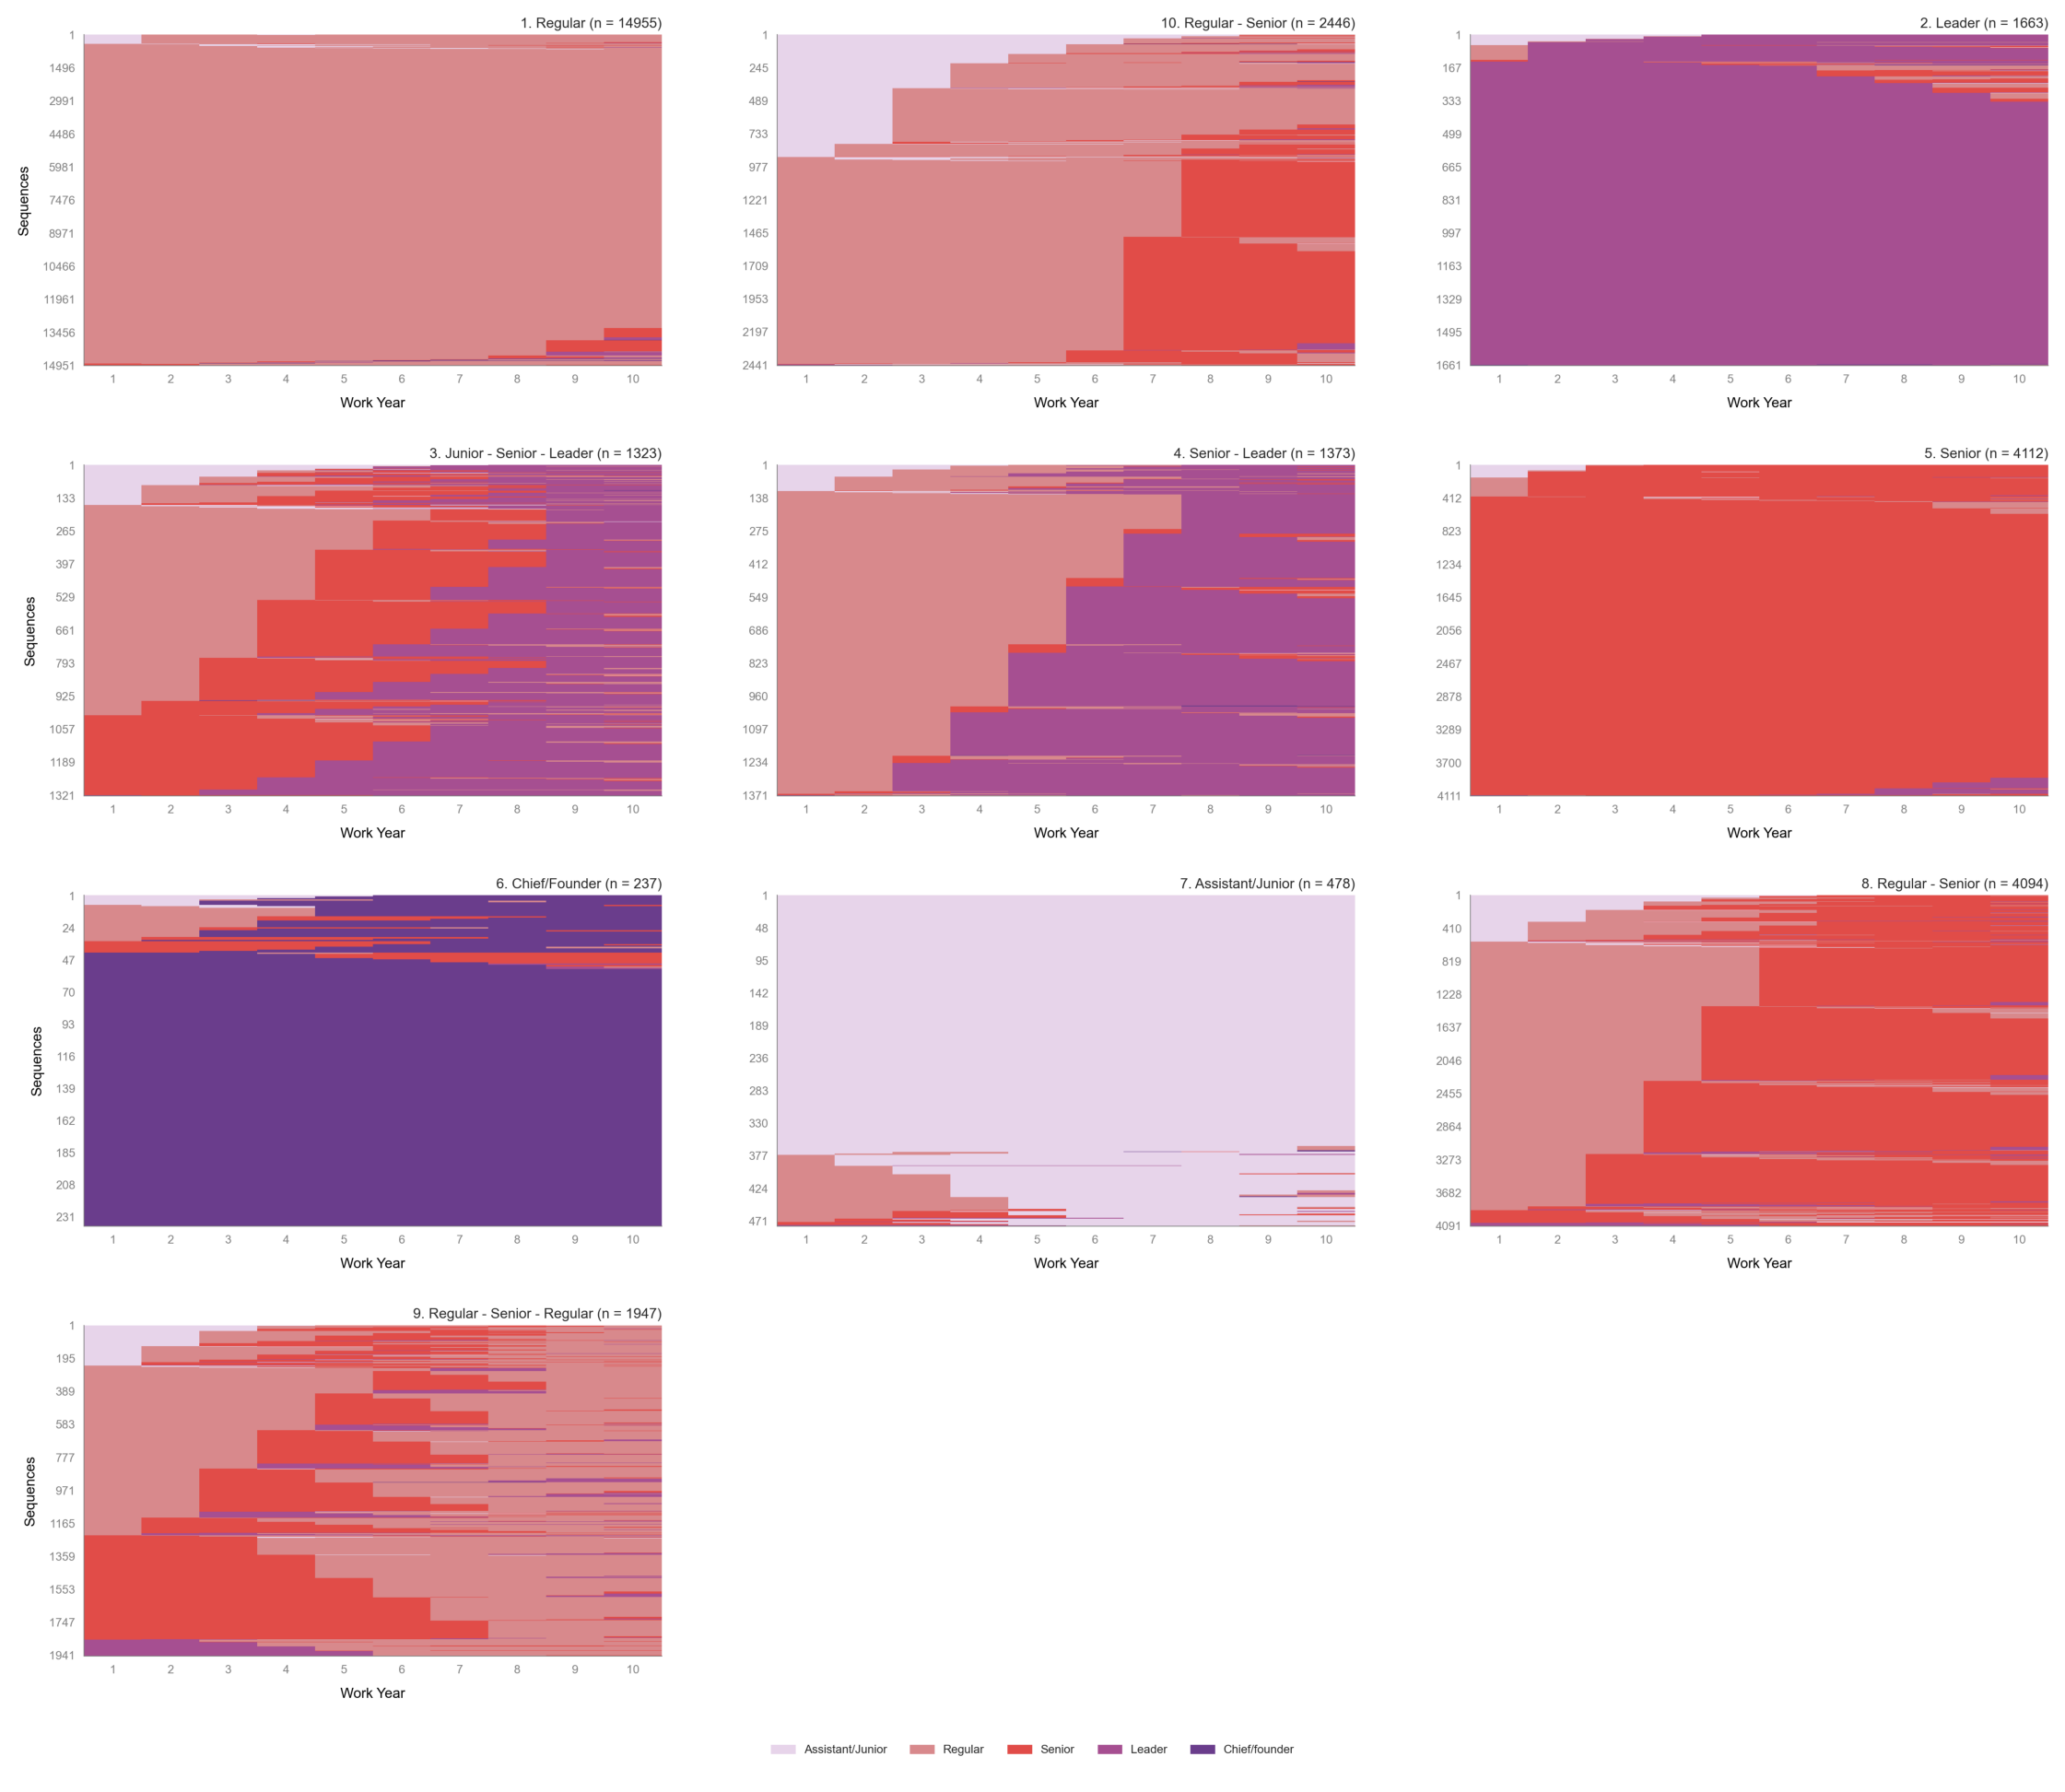

In [47]:
# Change the name of each cluster as the value of the 'cluster' column in the membership table
# cluster 1 -> Regular, 2 -> Leader, 3 -> Junior - Senior - Leader, 
# 4 -> Senior - Leader, 5 -> Senior, 6 -> Chief/Founder, 
# 7 -> Assistant/Junior, 8 -> Regular - Senior, 9 -> Regular - Senior - Regular,
# 10 -> Regular - Senior

# 映射字典
cluster_name_map = {
    1: "1. Regular",
    2: "2. Leader",
    3: "3. Junior - Senior - Leader",
    4: "4. Senior - Leader",
    5: "5. Senior",
    6: "6. Chief/Founder",
    7: "7. Assistant/Junior",
    8: "8. Regular - Senior",
    9: "9. Regular - Senior - Regular",
    10: "10. Regular - Senior",
}

# 列名可能是 'cluster' 或 'Cluster'
col = 'cluster' if 'cluster' in cluster_10_membership_table.columns else 'Cluster'

# 方案一：直接覆盖列为名称（未匹配的保持原值）
cluster_10_membership_table[col] = pd.to_numeric(cluster_10_membership_table[col], errors='coerce')\
    .map(cluster_name_map).fillna(cluster_10_membership_table[col])

plot_sequence_index(seqdata=seniority_sequence,
                    id_group_df=cluster_10_membership_table,
                    xlabel='Work Year',
                    categories='Cluster',
                    save_as='cluster_10_index_plot_seniority')


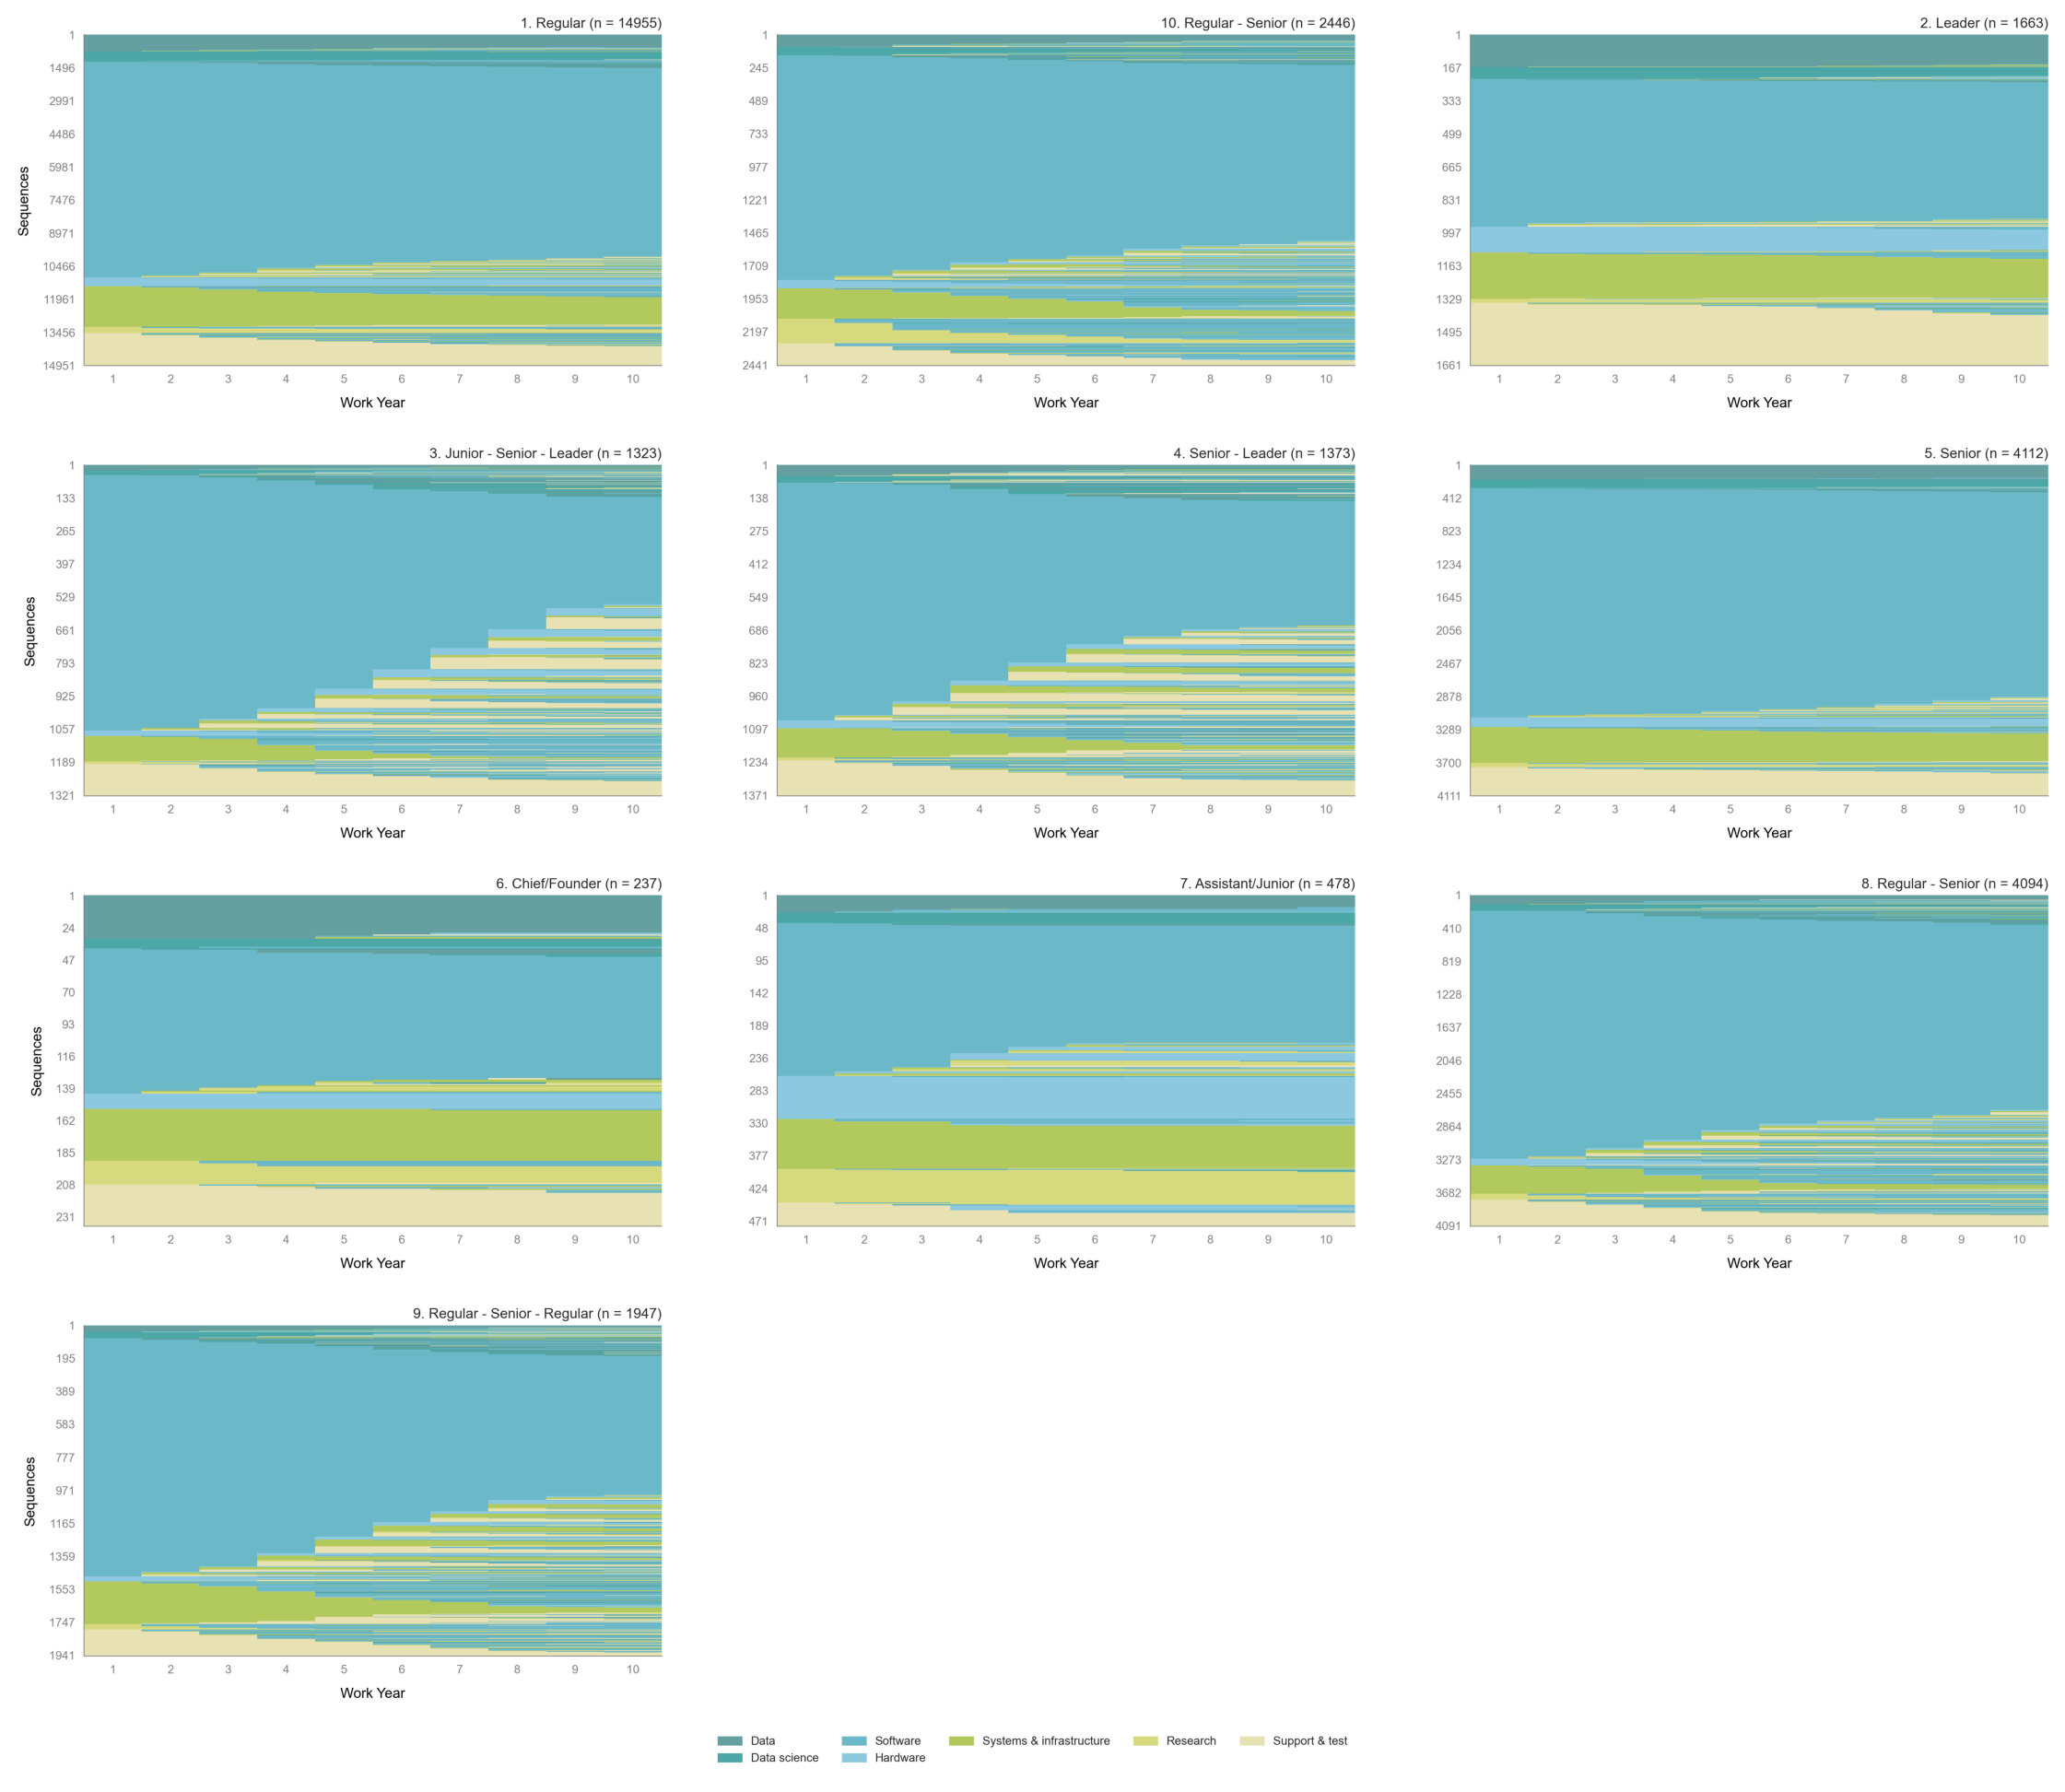

In [49]:
# only select clusters "1. Regular" "5. Senior" "7. Assistant/Junior"  "8. Regular - Senior"

# visualize_occupation_membership_table = cluster_10_membership_table[cluster_10_membership_table['Cluster'].isin(['1. Regular', '5. Senior', '7. Assistant/Junior', '8. Regular - Senior'])]

plot_sequence_index(seqdata=occupation_sequence,
                    id_group_df=cluster_10_membership_table,
                    xlabel='Work Year',
                    categories='Cluster',
                    # save_as='cluster_10_index_plot_seniority'
                    )

只选取显著的clusters，然后看看男女index plot差异，不然这样看确实看不出来

然后试试binary logit model，programming intensive vs test and support for each cluster

## Regression

In [44]:
# Regression model

import pandas as pd
import statsmodels.formula.api as smf
from stargazer.stargazer import Stargazer
import numpy as np

num_clusters = 10

df_path = '/Users/lei/Library/CloudStorage/OneDrive-Nexus365/yuqi_dphil/data/occupational_segregation_paper/cleaned_data'


def merge_dfs_into_df():
    df = with_controls_df.merge(original_df, on=['worker_id'])
    return df


def preprocess_data(df):
    # One-hot encoding
    df = pd.get_dummies(df, prefix=['gender', 'cluster', 'country'], columns=['gender', 'cluster', 'country'])

    # Merge degrees
    df['highest_educational_degree'] = df['highest_educational_degree'].replace(
        {'PhD': 'Advanced Degree', 'Master': 'Advanced Degree'})

    # Convert cluster columns to categorical codes
    for cluster in range(1, num_clusters+1):
        df[f'cluster_{cluster}'] = pd.Categorical(df[f'cluster_{cluster}']).codes

    return df


def run_logit_models_by_country(df, country_label):
    df_country = df[df[f'country_{country_label.lower()}'] == 1].copy()
    formula_list = []
    model_list = []

    for cluster in range(1, num_clusters+1):
        formula = f"""cluster_{cluster} ~ C(gender_female) + work_years + 
                      C(gender_female) * work_years 
                      + C(gender_female) * C(highest_educational_degree, Treatment(reference='Bachelor')) 
                      + C(gender_female) * C(whether_bachelor_university_prestigious, Treatment(reference=False)) 
                      + C(highest_educational_degree, Treatment(reference='Bachelor')) 
                      + C(whether_bachelor_university_prestigious, Treatment(reference=False)) 
                      + C(internationalization, Treatment(reference='Local')) 
                      + C(simplified_company_size, Treatment(reference='Micro (0-10 employees)')) 
                      """
        try:
            model = smf.logit(formula, data=df_country).fit()
            print(f"\n📌 [{country_label}] cluster_{cluster} model summary:")
            # print(model.summary())

            odds_ratios = np.exp(model.params)
            # print(f'Odds Ratios:\n{odds_ratios}')

            marginal_effects = model.get_margeff()
            print('Marginal Effects:\n', marginal_effects.summary())

            model_list.append(model)
        except Exception as e:
            print(f"❌ Error fitting model for cluster {cluster} in {country_label}: {e}")

    if model_list:
        output_file = f'model_outputs_{country_label.lower()}.txt'
        with open(output_file, 'w') as f:
            stargazer = Stargazer(model_list)
            f.write(stargazer.render_latex())
        print(f"✅ Stargazer output written to {output_file}")
    else:
        print(f"⚠️ No models were fitted successfully for {country_label}.")


if __name__ == '__main__':
    # Load data
    # original_df = pd.read_csv('detailed_6_cluster_df_with_memberships.csv')
    original_df = cluster_10_membership_table.rename(columns={'Cluster': 'cluster', 'Entity ID': 'worker_id'})

    with_controls_df = pd.read_csv(f'{df_path}/df_final_encoded_categorical_levels.csv')
    with_controls_df = with_controls_df.drop(['organization_type', 'num_followers', 'industry', 'highest_seniority_level'], axis=1)

    # Merge gender and country from seniority_df into with_controls_df
    with_controls_df = with_controls_df.merge(seniority_df[['worker_id', 'gender', 'country']], on='worker_id', how='left')

    regression_df = merge_dfs_into_df()
    regression_df = preprocess_data(regression_df)

    # Run models by country
    run_logit_models_by_country(regression_df, 'India')
    run_logit_models_by_country(regression_df, 'US')

Optimization terminated successfully.
         Current function value: 0.661807
         Iterations 5

📌 [India] cluster_1 model summary:
Marginal Effects:
         Logit Marginal Effects       
Dep. Variable:              cluster_1
Method:                          dydx
At:                           overall
                                                                                                                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
C(gender_female)[T.True]                                                                                       0.0441      0.051      0.871      0.384      -0.055       0.143
C(highest_educational_degree, Treatment(reference='Bachelor'))[T.Advanced Degree]                             -0.0746      0.013     -5.557      0.000      -0.101    

US
* No sticky floor phenomenon
* Tend to stuck in senior positions (as no statistical significance to belong to higher seniority trajectories?)
* Need to see how to measure mid-seniority trap using another way, e.g., ordinal or other regression models

就是要意识到，不是所有的方法都能完全回应一个研究问题的，要通过不同的方法来理解，这也是我从ASR paper摸爬滚打中学到的，也发现这也形成了我自己的风格。

In [39]:
# Remove company_size from seniority_df, and get simplified_company_size from regression_df

seniority_df = seniority_df.drop(['company_size'], axis=1)

seniority_df = seniority_df.merge(regression_df[['worker_id', 'simplified_company_size']], on='worker_id', how='left')

seniority_df.to_csv("/Users/lei/Documents/Sequenzo_all_folders/sequenzo_local/test_data/real_data_my_paper/detailed_senority_levels_for_10_years_cleaned_and_merged_with_simplified_company_size.csv", index=False)

seniority_df

,worker_id,gender,country,cohort,highest_educational_degree,whether_bachelor_university_prestigious,internationalization,work_years,1,2,3,4,5,6,7,8,9,10,simplified_company_size
0,dilip-kumar-nath-7538746a,male,india,11-20 total work years,Bachelor,False,Multinational,15.250,Regular,Regular,Regular,Regular,Senior,Senior,Senior,Senior,Senior,Senior,Large (500+ employees)
1,vinodkumar-yadav-b7a976107,male,india,11-20 total work years,Bachelor,False,Local,11.500,Regular,Regular,Regular,Regular,Regular,Regular,Regular,Regular,Regular,Regular,Large (500+ employees)
2,rajani-kulkarni-72674649,female,india,11-20 total work years,Bachelor,False,Multinational,11.250,Regular,Regular,Regular,Regular,Regular,Regular,Regular,Leader,Leader,Regular,Large (500+ employees)
3,josh-slosson-07a1509,male,india,11-20 total work years,Bachelor,False,International,18.417,Regular,Regular,Regular,Regular,Regular,Regular,Regular,Regular,Regular,Regular,Small (11-50 employees)
4,jonatthan-rodriguez-8a5612121,male,india,11-20 total work years,Bachelor,False,Multinational,11.917,Regular,Regular,Senior,Senior,Senior,Senior,Senior,Senior,Senior,Senior,Large (500+ employees)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32623,edwardgu1915,male,us,0-10 total work years,Master,False,Multinational,10.499,Leader,Leader,Leader,Leader,Leader,Senior,Senior,Senior,Regular,Senior,Medium (51-500 employees)
32624,terry-ferguson-8060363a,male,us,21-30 total work years,Bachelor,False,Local,21.001,Regular,Regular,Regular,Regular,Regular,Regular,Regular,Regular,Regular,Regular,Large (500+ employees)
32625,christy-garner-677894213,female,us,21-30 total work years,Bachelor,False,Multinational,27.250,Regular,Regular,Regular,Regular,Regular,Regular,Regular,Regular,Regular,Regular,Medium (51-500 employees)
32626,jay-p-119369202,male,us,21-30 total work years,Bachelor,False,Local,23.417,Regular,Regular,Regular,Regular,Regular,Regular,Regular,Regular,Regular,Regular,Large (500+ employees)


In [40]:
seniority_df.to_csv("/Users/lei/Documents/Sequenzo_all_folders/sequenzo_local/test_data/real_data_my_paper/detailed_senority_levels_for_10_years_cleaned_and_merged_with_simplified_company_size.csv", index=False)